In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
output_csv = 'D:/GitHub/Prediction of El-Nino Events/data/raw/nino.csv'

In [3]:
# Load the CSV file we just created
df = pd.read_csv(output_csv)
df['date'] = pd.to_datetime(df['date']).dt.date  # Remove time part
df = df.set_index('date')

print("Original data shape:", df.shape)

Original data shape: (16047, 1)


## Exploratory Data Analysis

In [4]:
# === COMPREHENSIVE DATA EXPLORATION ===

print("📅 DATE RANGE ANALYSIS:")
print("=" * 50)

# Date range information
print(f"Start date: {df.index.min()}")
print(f"End date: {df.index.max()}")
print(f"Total records: {len(df):,}")

# Calculate time span
start_date = pd.to_datetime(df.index.min())
end_date = pd.to_datetime(df.index.max())
time_span = end_date - start_date
print(f"Time span: {time_span.days:,} days ({time_span.days/365.25:.1f} years)")

# Check for missing dates
full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df_dates = pd.to_datetime(df.index)
missing_dates = set(full_date_range) - set(df_dates)
print(f"Missing dates: {len(missing_dates):,}")

# Yearly data coverage
print(f"\n📊 YEARLY DATA COVERAGE:")
df_temp = df.copy()
df_temp.index = pd.to_datetime(df_temp.index)
yearly_counts = df_temp.groupby(df_temp.index.year).size()
print(f"Years covered: {yearly_counts.index.min()} to {yearly_counts.index.max()}")
print(f"Records per year (first 5): {yearly_counts.head().to_dict()}")
print(f"Records per year (last 5): {yearly_counts.tail().to_dict()}")

# Check if we have current/future data
current_year = pd.Timestamp.now().year
current_date = pd.Timestamp.now().date()
print(f"\n🔍 CURRENT DATA STATUS:")
print(f"Current year: {current_year}")
print(f"Current date: {current_date}")
print(f"Latest data date: {df.index.max()}")

# Check for future dates
future_data = df_temp[df_temp.index.date > current_date]
print(f"Future data points: {len(future_data):,}")
if len(future_data) > 0:
    print(f"Future date range: {future_data.index.min().date()} to {future_data.index.max().date()}")

# Data quality check
print(f"\n🎯 DATA QUALITY:")
print(f"SST value range: {df['sst'].min():.2f}°C to {df['sst'].max():.2f}°C")
print(f"Missing SST values: {df['sst'].isnull().sum():,}")
print(f"SST mean: {df['sst'].mean():.2f}°C")
print(f"SST std: {df['sst'].std():.2f}°C")

📅 DATE RANGE ANALYSIS:
Start date: 1981-09-01
End date: 2025-08-07
Total records: 16,047
Time span: 16,046 days (43.9 years)
Missing dates: 0

📊 YEARLY DATA COVERAGE:
Years covered: 1981 to 2025
Records per year (first 5): {1981: 122, 1982: 365, 1983: 365, 1984: 366, 1985: 365}
Records per year (last 5): {2021: 365, 2022: 365, 2023: 365, 2024: 366, 2025: 219}

🔍 CURRENT DATA STATUS:
Current year: 2025
Current date: 2025-08-10
Latest data date: 2025-08-07
Future data points: 0

🎯 DATA QUALITY:
SST value range: 24.03°C to 29.82°C
Missing SST values: 0
SST mean: 26.98°C
SST std: 1.00°C


In [5]:
# === FILTER DATASETS FOR DIFFERENT USAGE ===

# Convert index to datetime for filtering
df_temp = df.copy()
df_temp.index = pd.to_datetime(df_temp.index)

print("🎯 FILTERED DATASETS:")
print("=" * 50)

# 1. Historical/Training Dataset (1982-2014): EDA + Model Training
df_historical = df_temp[(df_temp.index.year >= 1982) & (df_temp.index.year <= 2014)]
df_training = df_historical.copy()  # Same as historical for efficiency
print(f"📚 Historical/Training (1982-2014): {len(df_historical):,} records ({len(df_historical)/365.25:.1f} years)")

# 2. Validation Dataset (2015-2024): Model Testing
df_validation = df_temp[(df_temp.index.year >= 2015) & (df_temp.index.year <= 2024)]
print(f"✅ Validation (2015-2024): {len(df_validation):,} records ({len(df_validation)/365.25:.1f} years)")

# 3. Recent Trends Dataset (2015-2024): Climate Analysis (same as validation)
df_recent = df_validation.copy()  # Same period for consistency
print(f"🔄 Recent Trends (2015-2024): {len(df_recent):,} records ({len(df_recent)/365.25:.1f} years)")

# 4. Current Dataset (2024-2025): Real-time Monitoring
df_current = df_temp[df_temp.index.year >= 2024]
print(f"📅 Current (2024-2025): {len(df_current):,} records ({len(df_current)/365.25:.1f} years)")

print(f"\n🔍 DATASET COMPARISON:")
datasets = {
    'Historical/Training (1982-2014)': df_historical,
    'Validation/Recent (2015-2024)': df_validation,
    'Current (2024-2025)': df_current
}

for name, dataset in datasets.items():
    sst_mean = dataset['sst'].mean()
    sst_std = dataset['sst'].std()
    sst_min = dataset['sst'].min()
    sst_max = dataset['sst'].max()
    print(f"  {name:30} : Mean={sst_mean:.2f}°C, Std={sst_std:.2f}°C, Range=[{sst_min:.1f}, {sst_max:.1f}]°C")

print(f"\n💡 OPTIMIZED USAGE STRATEGY:")
print("🔸 Historical/Training (1982-2014): EDA + Model Development (SAME FEATURES)")
print("🔸 Validation/Recent (2015-2024): Model Testing + Recent Trends Analysis") 
print("🔸 Current (2024-2025): Real-time monitoring and forecasting")

print(f"\n✅ KEY ADVANTAGES:")
print("• Historical = Training dataset → No feature recomputation needed")
print("• Clean 32-year period for stable pattern analysis")
print("• 9-year validation period captures recent climate trends")
print("• Clear separation between historical and modern periods")
print("• Efficient feature engineering pipeline")

🎯 FILTERED DATASETS:
📚 Historical/Training (1982-2014): 12,053 records (33.0 years)
✅ Validation (2015-2024): 3,653 records (10.0 years)
🔄 Recent Trends (2015-2024): 3,653 records (10.0 years)
📅 Current (2024-2025): 585 records (1.6 years)

🔍 DATASET COMPARISON:
  Historical/Training (1982-2014) : Mean=26.92°C, Std=0.97°C, Range=[24.0, 29.3]°C
  Validation/Recent (2015-2024)  : Mean=27.21°C, Std=1.06°C, Range=[24.9, 29.8]°C
  Current (2024-2025)            : Mean=27.30°C, Std=0.88°C, Range=[25.5, 28.9]°C

💡 OPTIMIZED USAGE STRATEGY:
🔸 Historical/Training (1982-2014): EDA + Model Development (SAME FEATURES)
🔸 Validation/Recent (2015-2024): Model Testing + Recent Trends Analysis
🔸 Current (2024-2025): Real-time monitoring and forecasting

✅ KEY ADVANTAGES:
• Historical = Training dataset → No feature recomputation needed
• Clean 32-year period for stable pattern analysis
• 9-year validation period captures recent climate trends
• Clear separation between historical and modern periods
• E

In [6]:
# === HISTORICAL PATTERN ANALYSIS (1982-2014) ===

# Use historical dataset for pattern analysis
df_analysis = df_historical.copy()

# 1. Calculate SST anomalies based on historical climatology
historical_monthly_mean = df_analysis.groupby(df_analysis.index.month)['sst'].mean()
df_analysis['sst_anomaly'] = df_analysis['sst'] - df_analysis.index.month.map(historical_monthly_mean)

# 2. Define ENSO events based on historical thresholds
df_analysis['elnino_event'] = (df_analysis['sst_anomaly'] > 0.5).astype(int)
df_analysis['lanina_event'] = (df_analysis['sst_anomaly'] < -0.5).astype(int)

print("New features created:")
for col in df_analysis.columns:
    missing = df_analysis[col].isnull().sum()
    print(f"  {col}: {missing} missing values")

print(f"\nNew Features Count: {df_analysis.shape[1]-1}")
print("\nFirst few rows:")
print(df_analysis.head(3))


# Calculate seasonal patterns with proper historical data
print("\n🔄 CALCULATING PATTERNS WITH HISTORICAL DATA (1982-2020):")
print("=" * 60)

# Historical seasonal analysis
print("\n📊 HISTORICAL ENSO EVENT STATISTICS (1982-2020):")
elnino_years = df_analysis[df_analysis['elnino_event'] == 1].index.year.unique()
lanina_years = df_analysis[df_analysis['lanina_event'] == 1].index.year.unique()

print(f"  El Niño events: {len(elnino_years)} years - {sorted(elnino_years)}")
print(f"  La Niña events: {len(lanina_years)} years - {sorted(lanina_years)}")

# Monthly probability analysis (corrected)
elnino_prob = df_analysis.groupby(df_analysis.index.month)['elnino_event'].mean()
lanina_prob = df_analysis.groupby(df_analysis.index.month)['lanina_event'].mean()

print(f"\n📅 MONTHLY ENSO PROBABILITIES (Historical 1982-2020):")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, month in enumerate(months, 1):
    el_prob = elnino_prob[i] * 100
    la_prob = lanina_prob[i] * 100
    print(f"  {month}: El Niño {el_prob:.1f}%, La Niña {la_prob:.1f}%")

New features created:
  sst: 0 missing values
  sst_anomaly: 0 missing values
  elnino_event: 0 missing values
  lanina_event: 0 missing values

New Features Count: 3

First few rows:
              sst  sst_anomaly  elnino_event  lanina_event
date                                                      
1982-01-01  26.64     0.281251             0             0
1982-01-02  26.83     0.471251             0             0
1982-01-03  26.89     0.531251             1             0

🔄 CALCULATING PATTERNS WITH HISTORICAL DATA (1982-2020):

📊 HISTORICAL ENSO EVENT STATISTICS (1982-2020):
  El Niño events: 25 years - [1982, 1983, 1986, 1987, 1988, 1990, 1991, 1992, 1993, 1994, 1995, 1997, 1998, 2002, 2003, 2004, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014]
  La Niña events: 27 years - [1982, 1983, 1984, 1985, 1986, 1988, 1989, 1991, 1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

📅 MONTHLY ENSO PROBABILITIES (Historical 

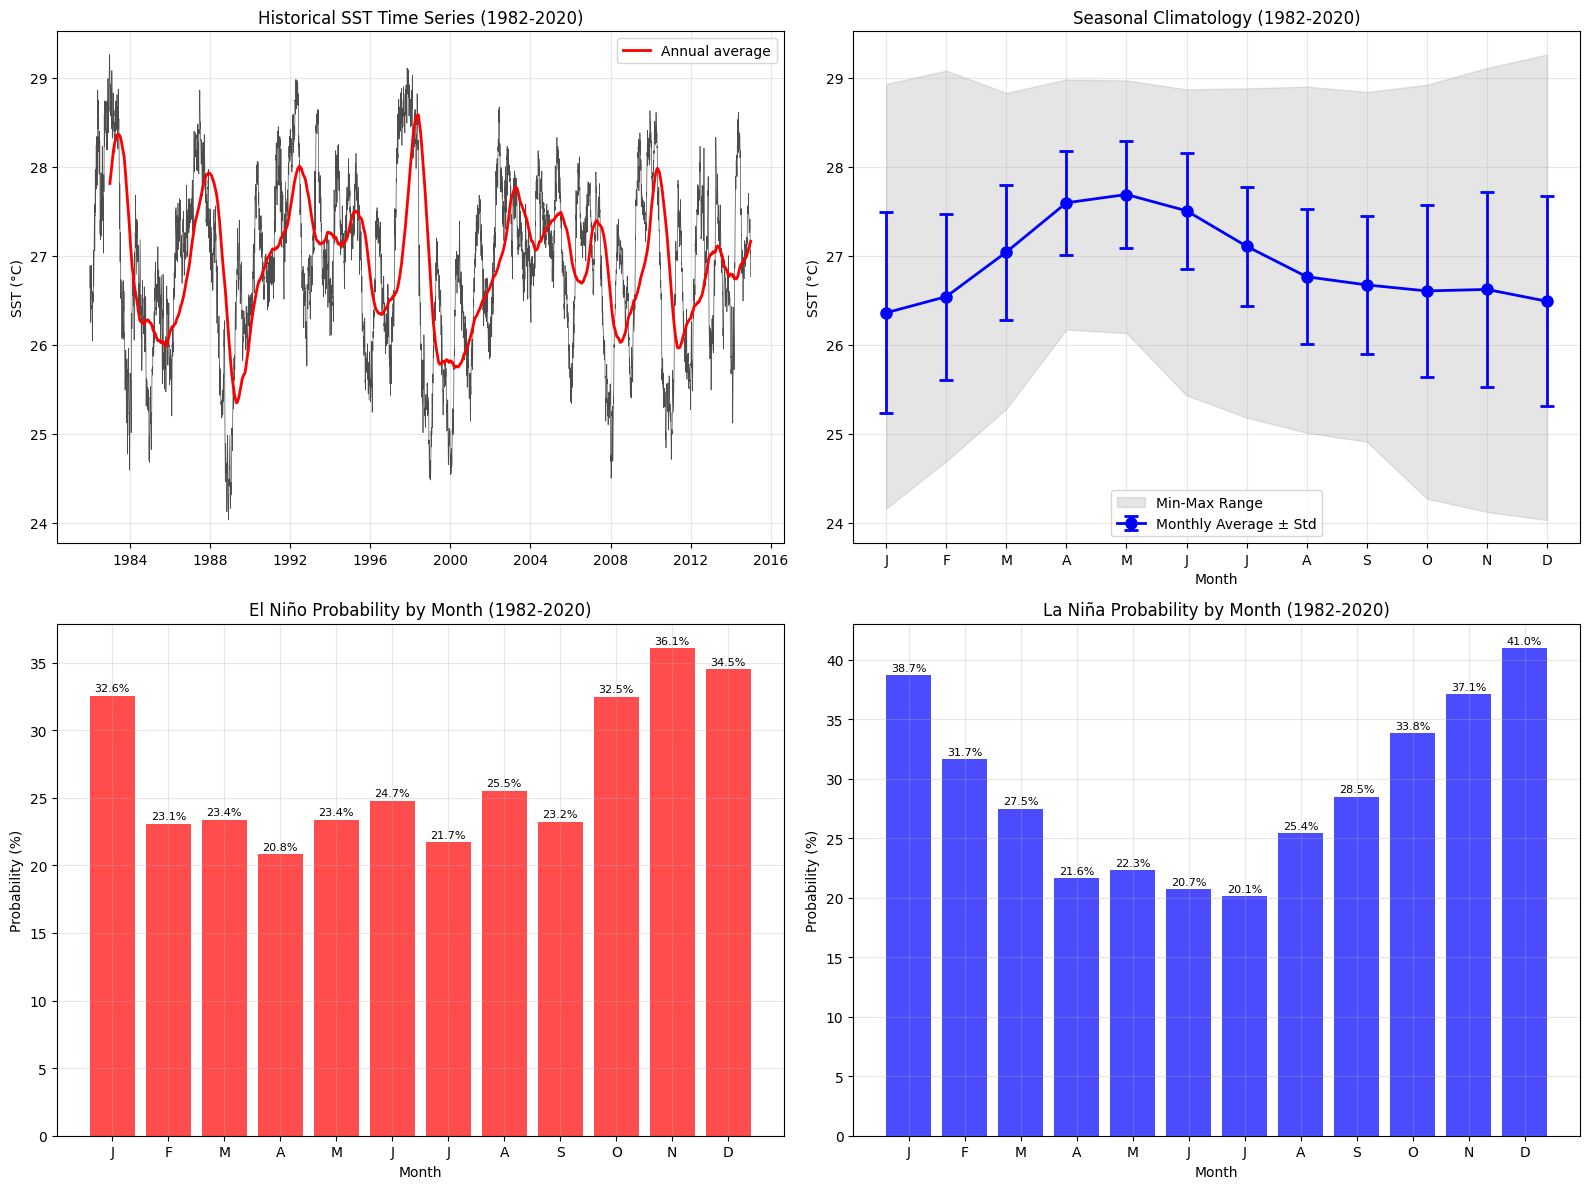

In [7]:
# fig Size
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Historical SST time series (1982-2020)
ax1.plot(df_analysis.index, df_analysis['sst'], color='black', linewidth=0.5, alpha=0.7)
ax1.plot(df_analysis.index, df_analysis['sst'].rolling(365).mean(), color='red', linewidth=2, label='Annual average')
ax1.set_title('Historical SST Time Series (1982-2020)')
ax1.set_ylabel('SST (°C)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Seasonal climatology
monthly_stats_hist = df_analysis.groupby(df_analysis.index.month)['sst'].agg(['mean', 'std', 'min', 'max'])
ax2.errorbar(monthly_stats_hist.index, monthly_stats_hist['mean'], 
             yerr=monthly_stats_hist['std'], fmt='o-', capsize=5, capthick=2,
             color='blue', linewidth=2, markersize=8, label='Monthly Average ± Std')
ax2.fill_between(monthly_stats_hist.index, monthly_stats_hist['min'], monthly_stats_hist['max'], 
                 alpha=0.2, color='gray', label='Min-Max Range')
ax2.set_title('Seasonal Climatology (1982-2020)')
ax2.set_xlabel('Month')
ax2.set_ylabel('SST (°C)')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax2.legend()
ax2.grid(True, alpha=0.3)

# Monthly probability analysis (corrected)
elnino_prob = df_analysis.groupby(df_analysis.index.month)['elnino_event'].mean()
lanina_prob = df_analysis.groupby(df_analysis.index.month)['lanina_event'].mean()

# Plot 3: El Niño probability by month
bars1 = ax3.bar(elnino_prob.index, elnino_prob.values * 100, color='red', alpha=0.7)
ax3.set_title('El Niño Probability by Month (1982-2020)')
ax3.set_ylabel('Probability (%)')
ax3.set_xlabel('Month')
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax3.grid(True, alpha=0.3)

# Add percentage labels
for bar, prob in zip(bars1, elnino_prob.values * 100):
    height = bar.get_height()
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.2, f'{prob:.1f}%',
                 ha='center', va='bottom', fontsize=8)

# Plot 4: La Niña probability by month
bars2 = ax4.bar(lanina_prob.index, lanina_prob.values * 100, color='blue', alpha=0.7)
ax4.set_title('La Niña Probability by Month (1982-2020)')
ax4.set_ylabel('Probability (%)')
ax4.set_xlabel('Month')
ax4.set_xticks(range(1, 13))
ax4.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax4.grid(True, alpha=0.3)

# Add percentage labels
for bar, prob in zip(bars2, lanina_prob.values * 100):
    height = bar.get_height()
    if height > 0:
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.2, f'{prob:.1f}%',
                 ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/historical_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

# Temporal Lag Features

- Use past SST values to predict current conditions

- El Niño develops over 3-6 months, past values contain predictive signals

In [8]:
# === TEMPORAL LAG FEATURES ===

# Create lag features (shift moves data backwards in time)
df_analysis['sst_lag_1w'] = df_analysis['sst'].shift(7)      # 1 week ago
df_analysis['sst_lag_1m'] = df_analysis['sst'].shift(30)     # 1 month ago  
df_analysis['sst_lag_3m'] = df_analysis['sst'].shift(90)     # 3 months ago
df_analysis['sst_lag_6m'] = df_analysis['sst'].shift(180)    # 6 months ago
df_analysis['sst_lag_12m'] = df_analysis['sst'].shift(365)   # 12 months ago

print("Features created:")
lag_cols = [col for col in df_analysis.columns if 'lag' in col]
for col in lag_cols:
    missing = df_analysis[col].isnull().sum()
    print(f"  {col}: {missing} missing values")

print(f"\nDataFrame shape after adding lags: {df_analysis.shape}")
print("\nSample data with lag features:")
print(df_analysis[['sst'] + lag_cols].head(10))

Features created:
  sst_lag_1w: 7 missing values
  sst_lag_1m: 30 missing values
  sst_lag_3m: 90 missing values
  sst_lag_6m: 180 missing values
  sst_lag_12m: 365 missing values

DataFrame shape after adding lags: (12053, 9)

Sample data with lag features:
              sst  sst_lag_1w  sst_lag_1m  sst_lag_3m  sst_lag_6m  sst_lag_12m
date                                                                          
1982-01-01  26.64         NaN         NaN         NaN         NaN          NaN
1982-01-02  26.83         NaN         NaN         NaN         NaN          NaN
1982-01-03  26.89         NaN         NaN         NaN         NaN          NaN
1982-01-04  26.81         NaN         NaN         NaN         NaN          NaN
1982-01-05  26.68         NaN         NaN         NaN         NaN          NaN
1982-01-06  26.58         NaN         NaN         NaN         NaN          NaN
1982-01-07  26.53         NaN         NaN         NaN         NaN          NaN
1982-01-08  26.46       26.64 

This plot compares current SST with 3, 6, and 12 month lagged values, highlighting how past ocean temperatures relate to present conditions.


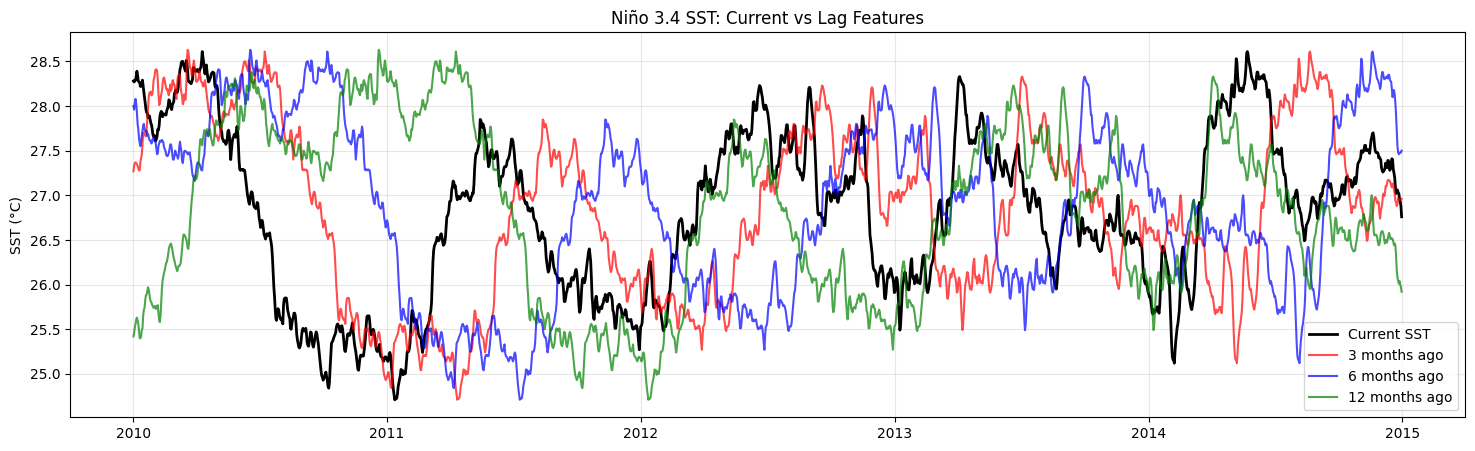

In [9]:
# === VISUALIZE TEMPORAL LAG FEATURES ===
# Plot 1: Time series comparison

df_plot = df_analysis.dropna()  
df_plot = df_plot.loc['2010':'2014']

plt.figure(figsize=(18, 5))
plt.plot(df_plot.index, df_plot['sst'], label='Current SST', color='black', linewidth=2)
plt.plot(df_plot.index, df_plot['sst_lag_3m'], label='3 months ago', color='red', alpha=0.7)
plt.plot(df_plot.index, df_plot['sst_lag_6m'], label='6 months ago', color='blue', alpha=0.7)
plt.plot(df_plot.index, df_plot['sst_lag_12m'], label='12 months ago', color='green', alpha=0.7)

plt.title('Niño 3.4 SST: Current vs Lag Features')
plt.ylabel('SST (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/lag_vs_current.png')

print("This plot compares current SST with 3, 6, and 12 month lagged values, highlighting how past ocean temperatures relate to present conditions.")


Lag Features Analysis:
1 week: 0.964
1 month: 0.876
3 months: 0.521
6 months: 0.157
12 months: 0.154

💡 Key Insights:
• Shorter lags (1 week, 1 month) have the highest correlation with current SST.
• Predictive power drops rapidly for longer lags (6-12 months).
• 3 monthS lags still retain moderate predictive value, reflecting ENSO's memory.
• 6-12 months lag is much less informative for current SST prediction.

Best predictor: 1 week


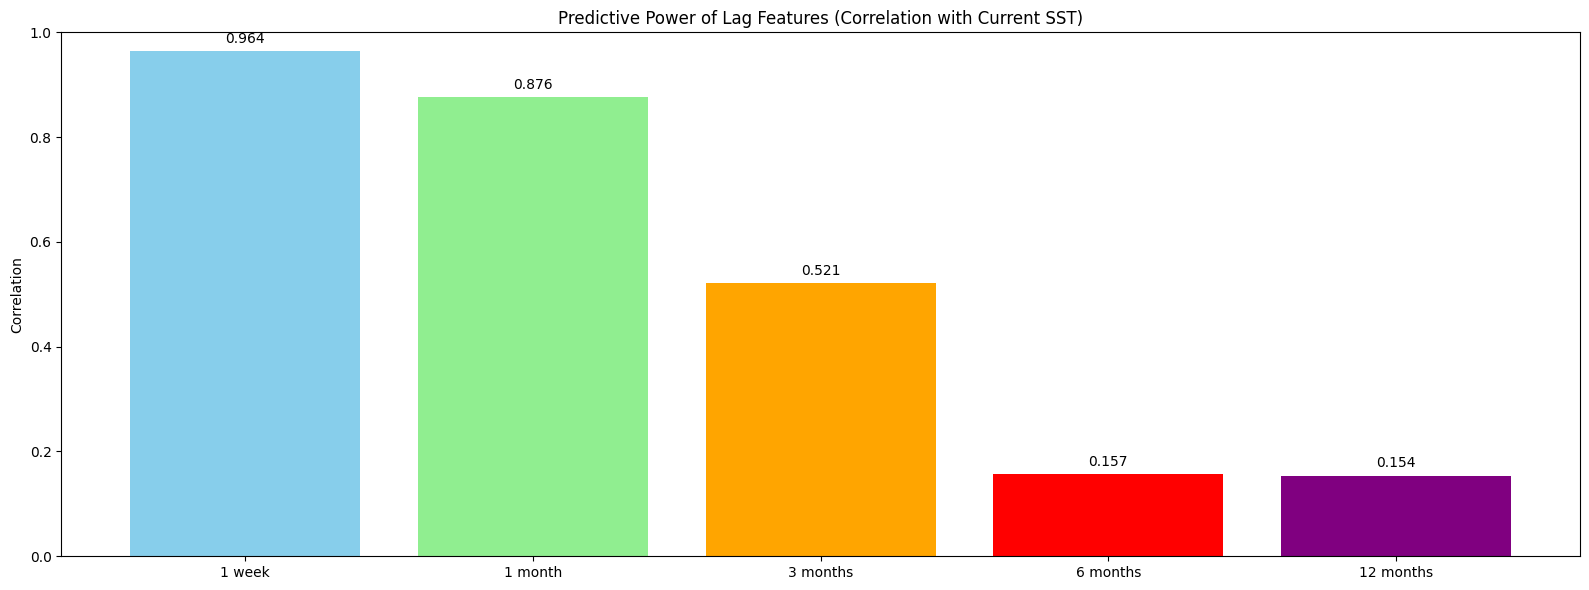

In [10]:
# Plot 2: Correlation analysis

correlations = []
for col in lag_cols:
    corr = df_analysis['sst'].corr(df_analysis[col])
    correlations.append(corr)

plt.figure(figsize=(16, 6))
lag_names = ['1 week', '1 month', '3 months', '6 months', '12 months']
plt.bar(lag_names, correlations, color=['skyblue', 'lightgreen', 'orange', 'red', 'purple'])
plt.title('Predictive Power of Lag Features (Correlation with Current SST)')
plt.ylabel('Correlation')
plt.ylim(0, 1)

# Add correlation values on bars
for i, v in enumerate(correlations):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/lag_correlation.png')

print("\nLag Features Analysis:")
for i in range(len(lag_names)):
    print(f"{lag_names[i]}: {correlations[i]:.3f}")
print("\n💡 Key Insights:")
print("• Shorter lags (1 week, 1 month) have the highest correlation with current SST.")
print("• Predictive power drops rapidly for longer lags (6-12 months).")
print("• 3 monthS lags still retain moderate predictive value, reflecting ENSO's memory.")
print("• 6-12 months lag is much less informative for current SST prediction.")
print(f"\nBest predictor: {lag_names[correlations.index(max(correlations))]}")

# Rolling Statistical Features

Calculate statistics over moving time windows
- **Trend detection**: 30-day average shows warming/cooling trends
- **Volatility**: Standard deviation captures ocean instability
- **Noise reduction**: Smooths daily fluctuations to reveal patterns
- **El Niño precursors**: High volatility often signals upcoming events

In [11]:
# === ROLLING STATISTICAL FEATURES ===

# Rolling means (trend detection)
df_analysis['sst_roll_7d'] = df_analysis['sst'].rolling(window=7).mean()      # Weekly average
df_analysis['sst_roll_30d'] = df_analysis['sst'].rolling(window=30).mean()    # Monthly average
df_analysis['sst_roll_90d'] = df_analysis['sst'].rolling(window=90).mean()    # Quarterly average

# Rolling standard deviation (volatility detection)
df_analysis['sst_vol_7d'] = df_analysis['sst'].rolling(window=7).std()       # Weekly volatility
df_analysis['sst_vol_30d'] = df_analysis['sst'].rolling(window=30).std()     # Monthly volatility

# Rolling min/max (range detection)
df_analysis['sst_max_30d'] = df_analysis['sst'].rolling(window=30).max()     # 30-day maximum
df_analysis['sst_min_30d'] = df_analysis['sst'].rolling(window=30).min()     # 30-day minimum
df_analysis['sst_range_30d'] = df_analysis['sst_max_30d'] - df_analysis['sst_min_30d'] # Temperature range

print("Rolling features created:")
rolling_cols = [col for col in df_analysis.columns if any(x in col for x in ['roll', 'vol', 'max', 'min', 'range'])]
for col in rolling_cols:
    missing = df_analysis[col].isnull().sum()
    print(f"  {col}: {missing} missing values")

print(f"\nTotal features now: {df_analysis.shape[1]}")
print("\nSample rolling features:")
print(df_analysis[['sst'] + rolling_cols[:5]].head(10))

Rolling features created:
  sst_roll_7d: 6 missing values
  sst_roll_30d: 29 missing values
  sst_roll_90d: 89 missing values
  sst_vol_7d: 6 missing values
  sst_vol_30d: 29 missing values
  sst_max_30d: 29 missing values
  sst_min_30d: 29 missing values
  sst_range_30d: 29 missing values

Total features now: 17

Sample rolling features:
              sst  sst_roll_7d  sst_roll_30d  sst_roll_90d  sst_vol_7d  \
date                                                                     
1982-01-01  26.64          NaN           NaN           NaN         NaN   
1982-01-02  26.83          NaN           NaN           NaN         NaN   
1982-01-03  26.89          NaN           NaN           NaN         NaN   
1982-01-04  26.81          NaN           NaN           NaN         NaN   
1982-01-05  26.68          NaN           NaN           NaN         NaN   
1982-01-06  26.58          NaN           NaN           NaN         NaN   
1982-01-07  26.53    26.708571           NaN           NaN    0.136

This plot shows how rolling averages (7-day, 30-day) smooth out short-term SST fluctuations to reveal underlying warming/cooling trends.


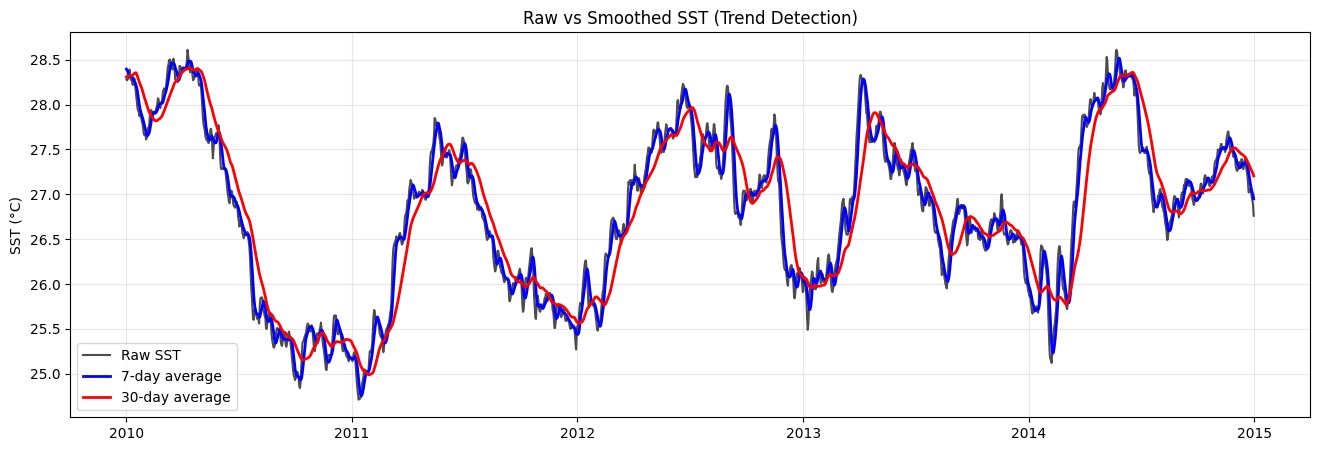

In [12]:
# === VISUALIZE ROLLING FEATURES ===
# Plot 1: Raw vs Smoothed SST

df_plot = df_analysis.dropna()
df_plot = df_plot.loc['2010':'2014']

plt.figure(figsize=(16, 5))
plt.plot(df_plot.index, df_plot['sst'], label='Raw SST', color='black', alpha=0.7)
plt.plot(df_plot.index, df_plot['sst_roll_7d'], label='7-day average', color='blue', linewidth=2)
plt.plot(df_plot.index, df_plot['sst_roll_30d'], label='30-day average', color='red', linewidth=2)

plt.title('Raw vs Smoothed SST (Trend Detection)')
plt.ylabel('SST (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/raw_smooth_sst.png')
print("This plot shows how rolling averages (7-day, 30-day) smooth out short-term SST fluctuations to reveal underlying warming/cooling trends.")

Periods of high SST volatility (standard deviation) often precede El Niño events, serving as an early warning signal.


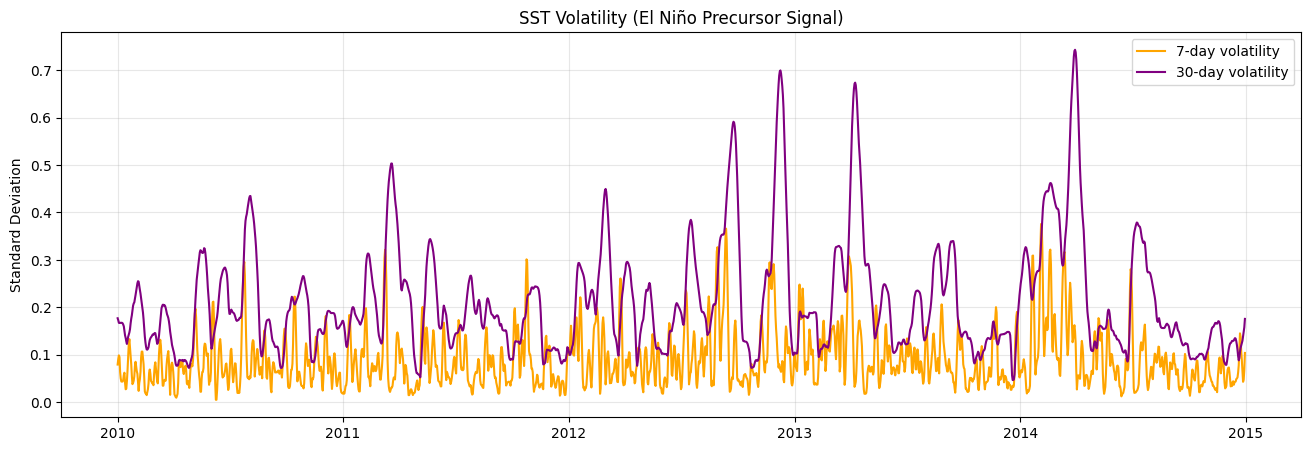

In [13]:
# Plot 2: Volatility over time

plt.figure(figsize=(16, 5))
plt.plot(df_plot.index, df_plot['sst_vol_7d'], label='7-day volatility', color='orange')
plt.plot(df_plot.index, df_plot['sst_vol_30d'], label='30-day volatility', color='purple')
plt.title('SST Volatility (El Niño Precursor Signal)')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/sst_volatility.png')

print("Periods of high SST volatility (standard deviation) often precede El Niño events, serving as an early warning signal.")

This plot shows the 30-day SST temperature range (min to max) as a shaded area (blue), highlighting periods of high variability and extremes.


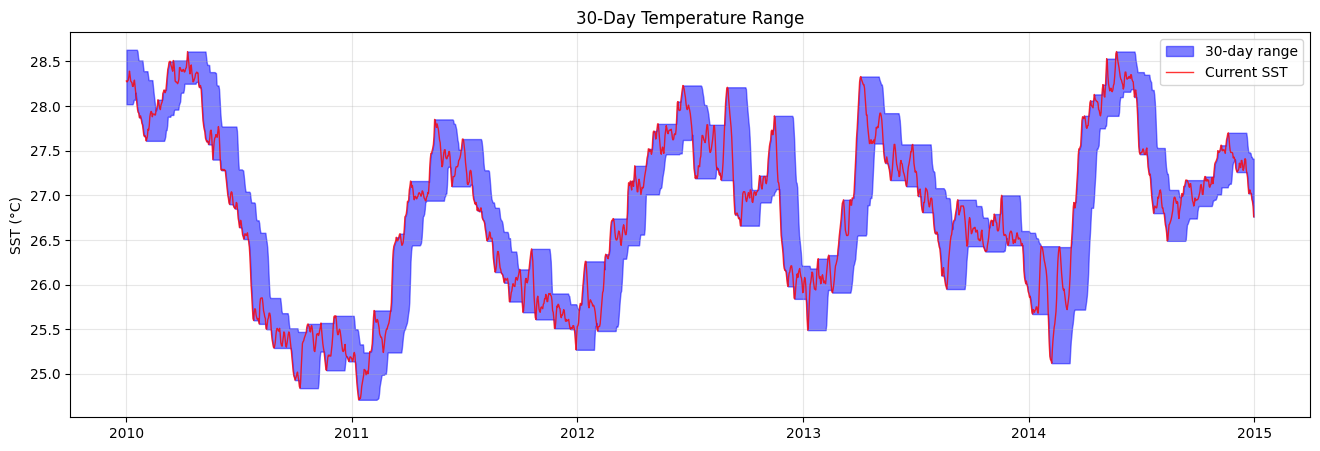

In [14]:
# Plot 3: Temperature range

plt.figure(figsize=(16, 5))
plt.fill_between(df_plot.index, df_plot['sst_min_30d'], df_plot['sst_max_30d'], 
                 alpha=0.5, color='blue', label='30-day range')
plt.plot(df_plot.index, df_plot['sst'], color='red', alpha=.8, label='Current SST', lw=1)
plt.title('30-Day Temperature Range')
plt.ylabel('SST (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/sst_temp_range.png')

print("This plot shows the 30-day SST temperature range (min to max) as a shaded area (blue), highlighting periods of high variability and extremes.")


📊 Rolling Feature Analysis:

  7d avg: 0.990 correlation
  30d avg: 0.958 correlation
  90d avg: 0.845 correlation
  30d vol: -0.101 correlation
  30d range: -0.089 correlation

💡 Key Insights:
• Higher rolling averages = smoother trends
• Volatility spikes often precede El Niño events
• 30-day features balance smoothness vs responsiveness


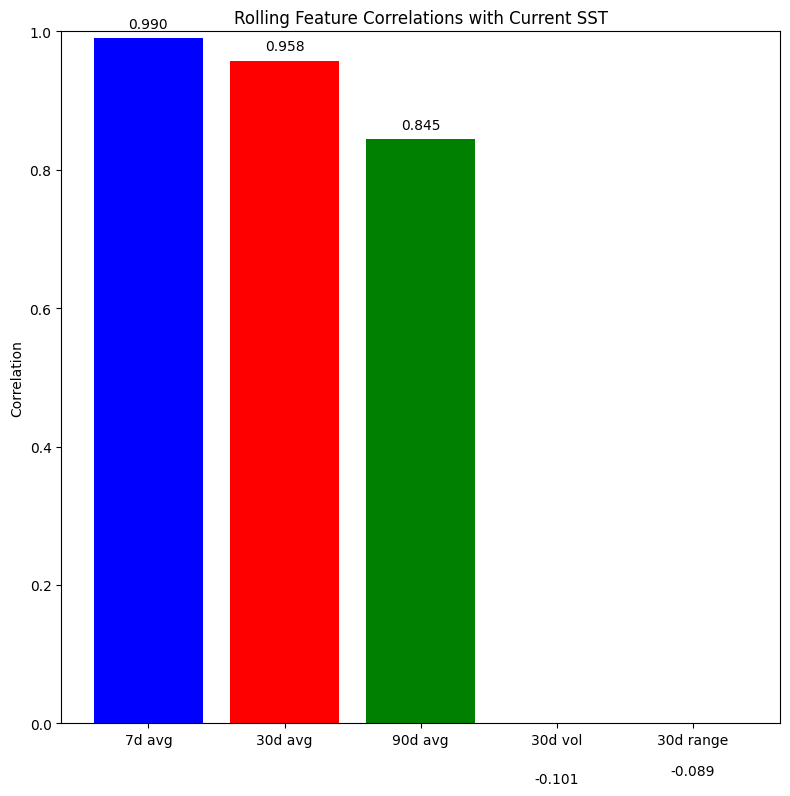

In [15]:
# Plot 4: Rolling vs Current correlation
rolling_features = ['sst_roll_7d', 'sst_roll_30d', 'sst_roll_90d', 'sst_vol_30d', 'sst_range_30d']
correlations = [df_analysis['sst'].corr(df_analysis[col]) for col in rolling_features]
feature_names = ['7d avg', '30d avg', '90d avg', '30d vol', '30d range']

plt.figure(figsize=(8,8))
bars = plt.bar(feature_names, correlations, color=['blue', 'red', 'green', 'orange', 'purple'])
plt.title('Rolling Feature Correlations with Current SST')
plt.ylabel('Correlation')
plt.ylim(0, 1)

# Add values on bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{corr:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/roll_correlation.png')

print("\n📊 Rolling Feature Analysis:\n")
for name, corr in zip(feature_names, correlations):
    print(f"  {name}: {corr:.3f} correlation")
    
print("\n💡 Key Insights:")
print("• Higher rolling averages = smoother trends")
print("• Volatility spikes often precede El Niño events")
print("• 30-day features balance smoothness vs responsiveness")

### Trend and Change Features

Measure rate of change and direction of SST movement Why Critical for El Niño:

- **Speed matters** - Rapid warming often signals strong El Niño events
- **Trend direction** - Sustained warming vs cooling patterns
- **Acceleration** - Is warming speeding up or slowing down?
- **Change magnitude** - Large changes indicate major ocean shifts

In [16]:
# === TREND AND CHANGE FEATURES ===

# Simple differences (rate of change)
df_analysis['sst_change_1d'] = df_analysis['sst'].diff(1)      # Daily change
df_analysis['sst_change_7d'] = df_analysis['sst'].diff(7)      # Weekly change  
df_analysis['sst_change_30d'] = df_analysis['sst'].diff(30)    # Monthly change
df_analysis['sst_change_90d'] = df_analysis['sst'].diff(90)    # Quarterly change

# Percentage changes
df_analysis['sst_pct_change_30d'] = df_analysis['sst'].pct_change(30) * 100

# Rolling linear trend (slope over time windows)
def calculate_slope(series):
    x = np.arange(len(series))
    if len(series) > 1:
        slope = np.polyfit(x, series, 1)[0]
        return slope
    return 0

df_analysis['sst_slope_30d'] = df_analysis['sst'].rolling(30).apply(calculate_slope)
df_analysis['sst_slope_90d'] = df_analysis['sst'].rolling(90).apply(calculate_slope)

# Acceleration - is change speeding up?
df_analysis['sst_acceleration'] = df_analysis['sst_change_30d'].diff(30)

# Trend direction (positive/negative/neutral)
df_analysis['trend_direction'] = np.where(df_analysis['sst_slope_30d'] > 0.01, 1,
                        np.where(df_analysis['sst_slope_30d'] < -0.01, -1, 0))

# Momentum strength
df_analysis['momentum_strength'] = abs(df_analysis['sst_change_30d'])

print("Trend and Change features created:")
trend_cols = [col for col in df_analysis.columns if any(x in col for x in ['change', 'slope', 'acceleration', 'trend', 'momentum'])]
for col in trend_cols:
    missing = df_analysis[col].isnull().sum()
    print(f"  {col}: {missing} missing values")

print(f"\nTotal features now: {df_analysis.shape[1]}")
print("\nSample trend features:")
print(df_analysis[['sst'] + trend_cols[:5]].head(10))

Trend and Change features created:
  sst_change_1d: 1 missing values
  sst_change_7d: 7 missing values
  sst_change_30d: 30 missing values
  sst_change_90d: 90 missing values
  sst_pct_change_30d: 30 missing values
  sst_slope_30d: 29 missing values
  sst_slope_90d: 89 missing values
  sst_acceleration: 60 missing values
  trend_direction: 0 missing values
  momentum_strength: 30 missing values

Total features now: 27

Sample trend features:
              sst  sst_change_1d  sst_change_7d  sst_change_30d  \
date                                                              
1982-01-01  26.64            NaN            NaN             NaN   
1982-01-02  26.83           0.19            NaN             NaN   
1982-01-03  26.89           0.06            NaN             NaN   
1982-01-04  26.81          -0.08            NaN             NaN   
1982-01-05  26.68          -0.13            NaN             NaN   
1982-01-06  26.58          -0.10            NaN             NaN   
1982-01-07  26.53 

🔍 Rapid changes (>1°C/month) often signal El Niño onset and La Niño (>-1°C/month)


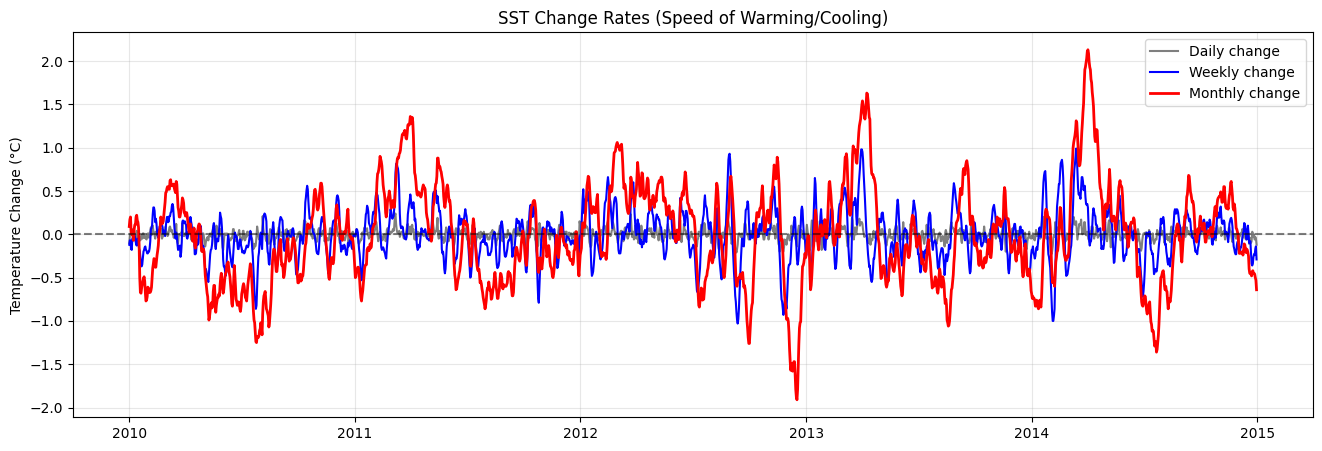

In [17]:
# === VISUALIZE TREND AND CHANGE FEATURES ===
# Plot 1: Change Magnitude Over Time

df_plot = df_analysis.dropna()
df_plot = df_plot.loc['2010':'2014']

plt.figure(figsize=(16, 5))
plt.plot(df_plot.index, df_plot['sst_change_1d'], label='Daily change', color='black', alpha=0.5)
plt.plot(df_plot.index, df_plot['sst_change_7d'], label='Weekly change', color='blue', linewidth=1.5)
plt.plot(df_plot.index, df_plot['sst_change_30d'], label='Monthly change', color='red', linewidth=2)

plt.title('SST Change Rates (Speed of Warming/Cooling)')
plt.ylabel('Temperature Change (°C)')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/sst_changes.png')

print("🔍 Rapid changes (>1°C/month) often signal El Niño onset and La Niño (>-1°C/month)")

📈 Sustained slopes >0.01°C/day often predict El Niño development


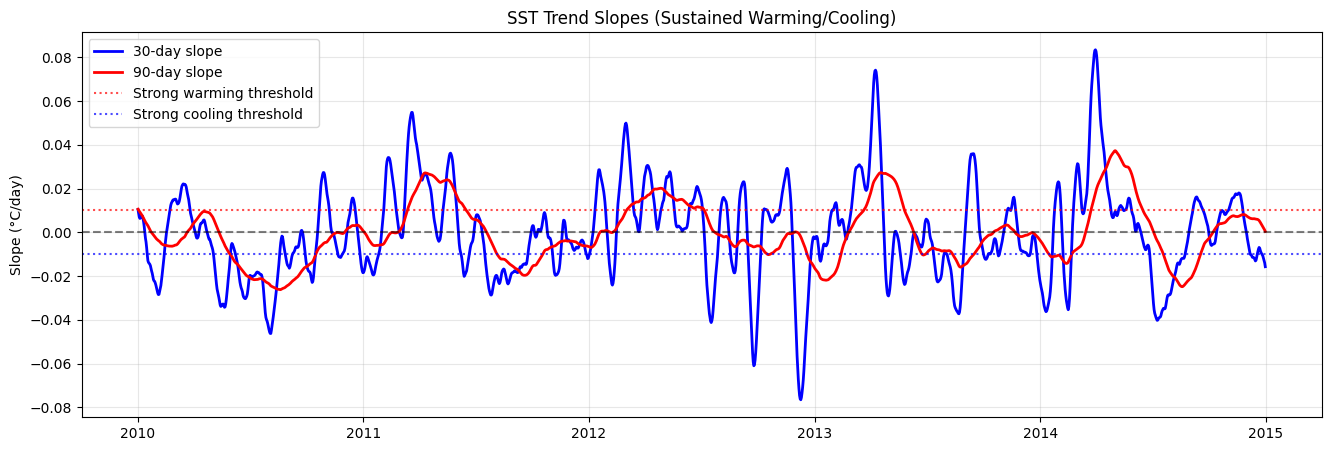

In [18]:
# Plot 2: Trend Slope Analysis

plt.figure(figsize=(16, 5))
plt.plot(df_plot.index, df_plot['sst_slope_30d'], label='30-day slope', color='blue', linewidth=2)
plt.plot(df_plot.index, df_plot['sst_slope_90d'], label='90-day slope', color='red', linewidth=2)

plt.title('SST Trend Slopes (Sustained Warming/Cooling)')
plt.ylabel('Slope (°C/day)')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.axhline(y=0.01, color='red', linestyle=':', alpha=0.7, label='Strong warming threshold')
plt.axhline(y=-0.01, color='blue', linestyle=':', alpha=0.7, label='Strong cooling threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/sst_slopes.png')

print("📈 Sustained slopes >0.01°C/day often predict El Niño development")

⚡ High acceleration periods often precede major El Niño events


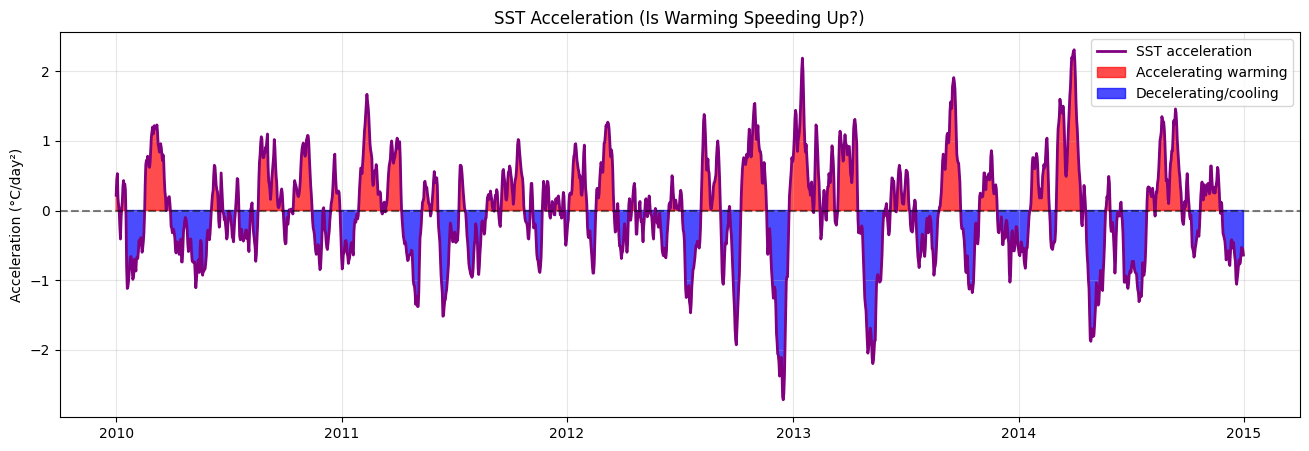

In [19]:
# Plot 3: Acceleration Patterns

plt.figure(figsize=(16, 5))
plt.plot(df_plot.index, df_plot['sst_acceleration'], color='purple', linewidth=2, label='SST acceleration')
plt.fill_between(df_plot.index, 0, df_plot['sst_acceleration'], 
                 where=(df_plot['sst_acceleration'] > 0), color='red', alpha=0.7, label='Accelerating warming')
plt.fill_between(df_plot.index, 0, df_plot['sst_acceleration'], 
                 where=(df_plot['sst_acceleration'] < 0), color='blue', alpha=0.7, label='Decelerating/cooling')

plt.title('SST Acceleration (Is Warming Speeding Up?)')
plt.ylabel('Acceleration (°C/day²)')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/sst_acceleration.png')

print("⚡ High acceleration periods often precede major El Niño events")

📊 Extreme changes (>1°C) occur <5% of time but are crucial predictors


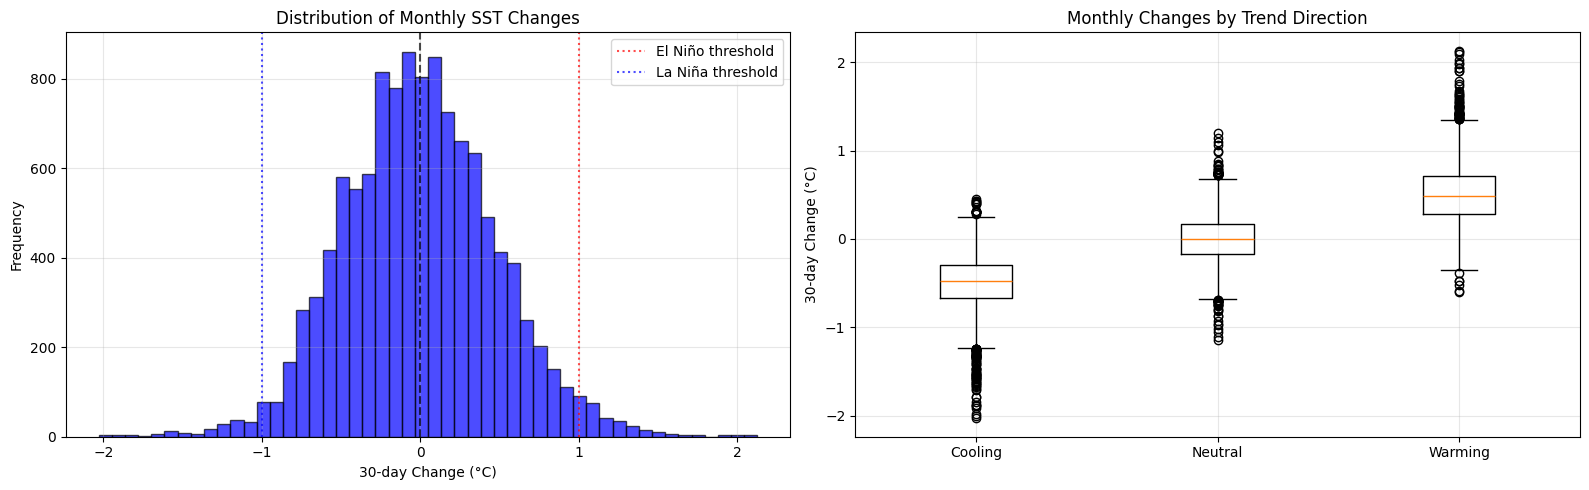

In [20]:
# Plot 4: Change Distribution Analysis

df_plot = df_analysis.dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Histogram of monthly changes
ax1.hist(df_plot['sst_change_30d'].dropna(), bins=50, alpha=0.7, color='blue', edgecolor='black')
ax1.axvline(x=0, color='black', linestyle='--', alpha=0.7)
ax1.axvline(x=1, color='red', linestyle=':', alpha=0.7, label='El Niño threshold')
ax1.axvline(x=-1, color='blue', linestyle=':', alpha=0.7, label='La Niña threshold')
ax1.set_title('Distribution of Monthly SST Changes')
ax1.set_xlabel('30-day Change (°C)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot of changes by trend direction
trend_data = []
trend_labels = []
for direction in [-1, 0, 1]:
    data = df_plot[df_plot['trend_direction'] == direction]['sst_change_30d'].dropna()
    trend_data.append(data)
    if direction == -1:
        trend_labels.append('Cooling')
    elif direction == 0:
        trend_labels.append('Neutral')
    else:
        trend_labels.append('Warming')

ax2.boxplot(trend_data, labels=trend_labels)
ax2.set_title('Monthly Changes by Trend Direction')
ax2.set_ylabel('30-day Change (°C)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/change_distribution.png')

print("📊 Extreme changes (>1°C) occur <5% of time but are crucial predictors")


🎯 Trend Feature Analysis:
  30d change: 0.324 correlation with future SST
  30d slope: 0.298 correlation with future SST
  90d slope: 0.347 correlation with future SST
  acceleration: 0.077 correlation with future SST
  momentum: -0.066 correlation with future SST

💡 Key Insights:
• Strong positive slopes predict future warming
• Acceleration captures momentum of change
• 30-day features more responsive than 90-day
• Trend direction helps classify warming/cooling periods


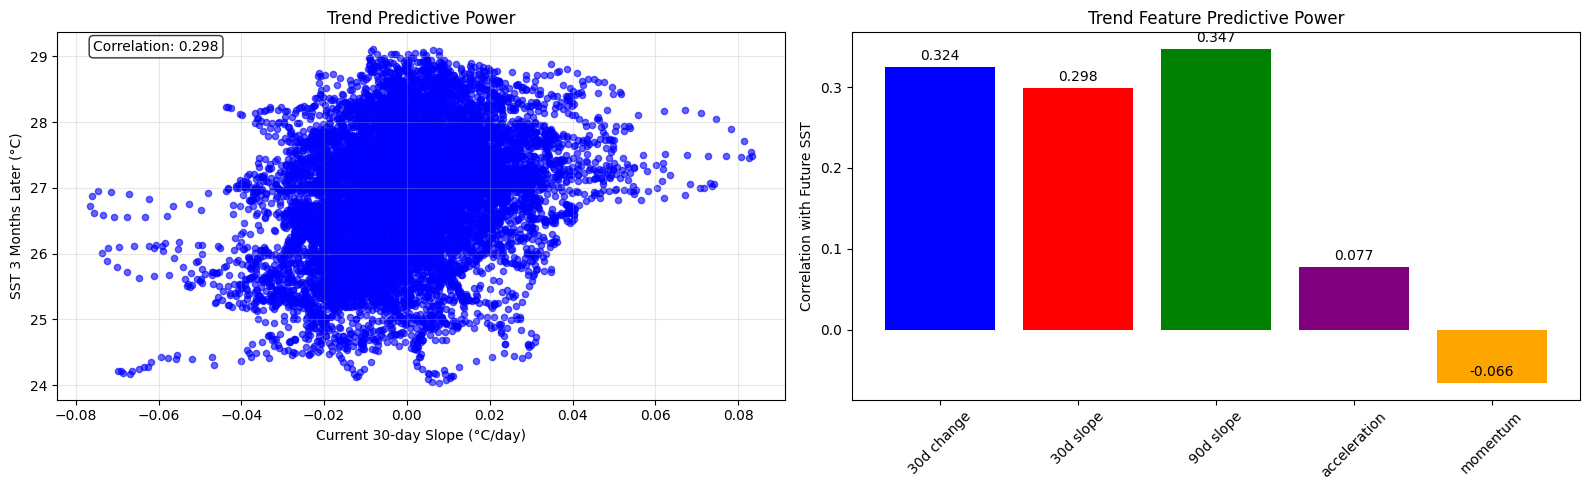

In [21]:
# Plot 5: Trend vs Future SST (Predictive Power Test)

# Create future SST column for prediction analysis
df_analysis['sst_future_3m'] = df_analysis['sst'].shift(-90)  # SST 3 months in future

df_plot = df_analysis.dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Scatter: Current trend vs future SST
ax1.scatter(df_plot['sst_slope_30d'], df_plot['sst_future_3m'], 
           alpha=0.6, color='blue', s=20)
ax1.set_xlabel('Current 30-day Slope (°C/day)')
ax1.set_ylabel('SST 3 Months Later (°C)')
ax1.set_title('Trend Predictive Power')
correlation = df_plot['sst_slope_30d'].corr(df_plot['sst_future_3m'])
ax1.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=ax1.transAxes, 
         bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))
ax1.grid(True, alpha=0.3)

# Correlation analysis of all trend features
trend_features = ['sst_change_30d', 'sst_slope_30d', 'sst_slope_90d', 'sst_acceleration', 'momentum_strength']
correlations = [df_plot[feature].corr(df_plot['sst_future_3m']) for feature in trend_features]
feature_names = ['30d change', '30d slope', '90d slope', 'acceleration', 'momentum']

bars = ax2.bar(feature_names, correlations, color=['blue', 'red', 'green', 'purple', 'orange'])
ax2.set_title('Trend Feature Predictive Power')
ax2.set_ylabel('Correlation with Future SST')
ax2.tick_params(axis='x', rotation=45)

# Add values on bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{corr:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/trend_predictive_power.png')

print("\n🎯 Trend Feature Analysis:")
for name, corr in zip(feature_names, correlations):
    print(f"  {name}: {corr:.3f} correlation with future SST")
    
print("\n💡 Key Insights:")
print("• Strong positive slopes predict future warming")
print("• Acceleration captures momentum of change")
print("• 30-day features more responsive than 90-day")
print("• Trend direction helps classify warming/cooling periods")

# Temporal Flags and Seasonal Features

Extract time-based patterns and seasonal cycles

- **Seasonal timing**: El Niño typically develops in spring, peaks in winter
- **Monthly patterns**: Certain months are more prone to onset/decay
- **Cyclical behavior**: ENSO follows predictable seasonal rhythms
- **Spring barrier**: Lower predictability during March-May period

In [22]:
# === TEMPORAL FLAGS AND SEASONAL FEATURES ===

# Convert index back to datetime for feature extraction
df_temp = df_analysis.copy()
df_temp.index = pd.to_datetime(df_temp.index)

# Basic temporal features
df_analysis['month'] = df_temp.index.month
df_analysis['quarter'] = df_temp.index.quarter
df_analysis['day_of_year'] = df_temp.index.dayofyear
df_analysis['week_of_year'] = df_temp.index.isocalendar().week

# Seasonal categories
def get_season(month):
    if month in [12, 1, 2]:
        return 'DJF'  # Dec-Jan-Feb (Peak El Niño season)
    elif month in [3, 4, 5]:
        return 'MAM'  # Mar-Apr-May (Spring barrier)
    elif month in [6, 7, 8]:
        return 'JJA'  # Jun-Jul-Aug (Development season)
    else:
        return 'SON'  # Sep-Oct-Nov (Onset season)

df_analysis['seasons'] = df_analysis['month'].apply(get_season)

# ENSO-specific seasonal flags
df_analysis['is_peak_season'] = (df_analysis['month'].isin([12, 1, 2])).astype(int)  # DJF
df_analysis['is_development_season'] = (df_analysis['month'].isin([6, 7, 8])).astype(int)  # JJA
df_analysis['is_spring_barrier'] = (df_analysis['month'].isin([3, 4, 5])).astype(int)  # MAM
df_analysis['is_onset_season'] = (df_analysis['month'].isin([9, 10, 11])).astype(int)  # SON

# Cyclical encoding (captures periodicity)
df_analysis['month_sin'] = np.sin(2 * np.pi * df_analysis['month'] / 12)
df_analysis['month_cos'] = np.cos(2 * np.pi * df_analysis['month'] / 12)
df_analysis['day_sin'] = np.sin(2 * np.pi * df_analysis['day_of_year'] / 365.25)
df_analysis['day_cos'] = np.cos(2 * np.pi * df_analysis['day_of_year'] / 365.25)

print("Temporal and Seasonal features created:")
temporal_cols = [col for col in df_analysis.columns if any(x in col for x in ['month', 'quarter', 'seasons', 'day_of', 'week_of', 'is_', 'sin', 'cos'])]
for col in temporal_cols:
    if df_analysis[col].dtype == 'object':
        print(f"  {col}: {df_analysis[col].unique()}")
    else:
        print(f"  {col}: range {df_analysis[col].min():.3f} to {df_analysis[col].max():.3f}")

print(f"\nTotal features now: {df_analysis.shape[1]}")
print("\nSample temporal features:")
print(df_analysis[['sst', 'month', 'seasons', 'is_peak_season', 'month_sin']].head(10))

Temporal and Seasonal features created:
  month: range 1.000 to 12.000
  quarter: range 1.000 to 4.000
  day_of_year: range 1.000 to 366.000
  week_of_year: range 1.000 to 53.000
  seasons: ['DJF' 'MAM' 'JJA' 'SON']
  is_peak_season: range 0.000 to 1.000
  is_development_season: range 0.000 to 1.000
  is_spring_barrier: range 0.000 to 1.000
  is_onset_season: range 0.000 to 1.000
  month_sin: range -1.000 to 1.000
  month_cos: range -1.000 to 1.000
  day_sin: range -1.000 to 1.000
  day_cos: range -1.000 to 1.000

Total features now: 41

Sample temporal features:
              sst  month seasons  is_peak_season  month_sin
date                                                       
1982-01-01  26.64      1     DJF               1        0.5
1982-01-02  26.83      1     DJF               1        0.5
1982-01-03  26.89      1     DJF               1        0.5
1982-01-04  26.81      1     DJF               1        0.5
1982-01-05  26.68      1     DJF               1        0.5
1982-01-06

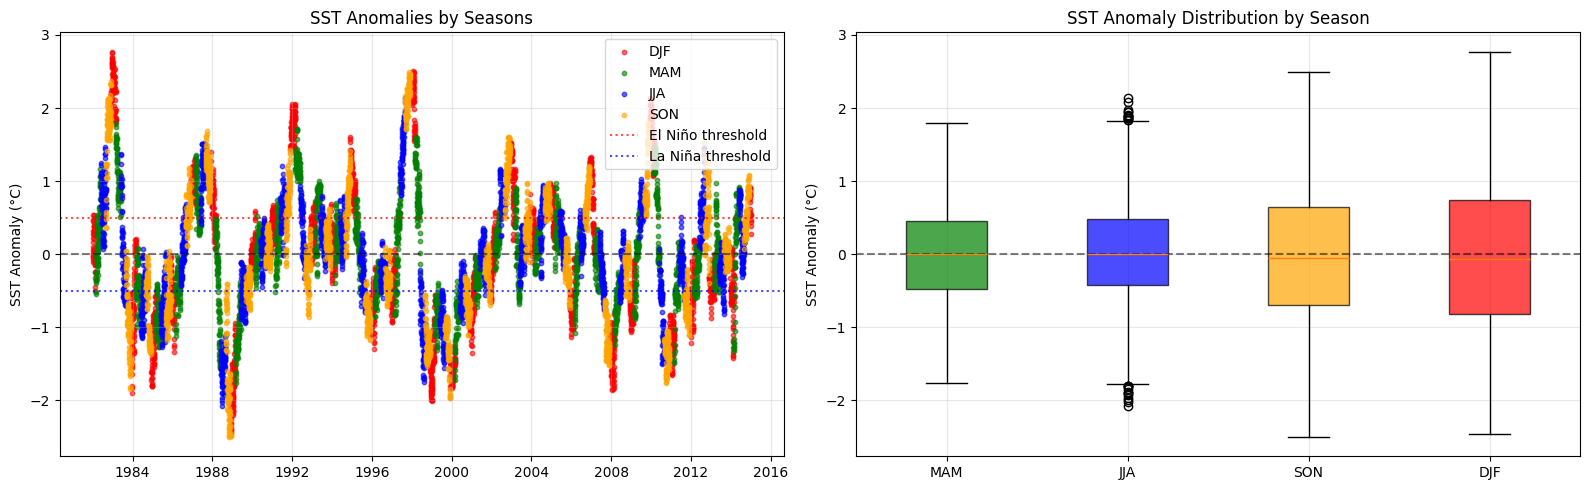

🔍 El Niño events typically peak in DJF (Dec-Jan-Feb), develop in JJA/SON


In [23]:
# Plot 1: Seasonal SST Anomaly Patterns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Time series of anomalies colored by season
colors = {'DJF': 'red', 'MAM': 'green', 'JJA': 'blue', 'SON': 'orange'}
for season in colors:
    season_data = df_analysis[df_analysis['seasons'] == season]
    ax1.scatter(season_data.index, season_data['sst_anomaly'], 
               c=colors[season], alpha=0.6, s=10, label=f'{season}')

ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.axhline(y=0.5, color='red', linestyle=':', alpha=0.7, label='El Niño threshold')
ax1.axhline(y=-0.5, color='blue', linestyle=':', alpha=0.7, label='La Niña threshold')
ax1.set_title('SST Anomalies by Seasons')
ax1.set_ylabel('SST Anomaly (°C)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot of anomalies by season
season_order = ['MAM', 'JJA', 'SON', 'DJF']  # Spring to Winter
anomaly_data = [df_analysis[df_analysis['seasons'] == s]['sst_anomaly'].dropna() for s in season_order]
box_plot = ax2.boxplot(anomaly_data, labels=season_order, patch_artist=True)

# Color boxes by season
for patch, season in zip(box_plot['boxes'], season_order):
    patch.set_facecolor(colors[season])
    patch.set_alpha(0.7)

ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_title('SST Anomaly Distribution by Season')
ax2.set_ylabel('SST Anomaly (°C)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/seasonal_anomalies.png')
plt.show()

print("🔍 El Niño events typically peak in DJF (Dec-Jan-Feb), develop in JJA/SON")

🔍 Seasonal Flag Correlations with SST Anomaly:
  Peak (DJF): -0.0000000000000007
  Development (JJA): -0.0000000000000002
  Spring Barrier (MAM): -0.0000000000000003
  Onset (SON): 0.0000000000000011


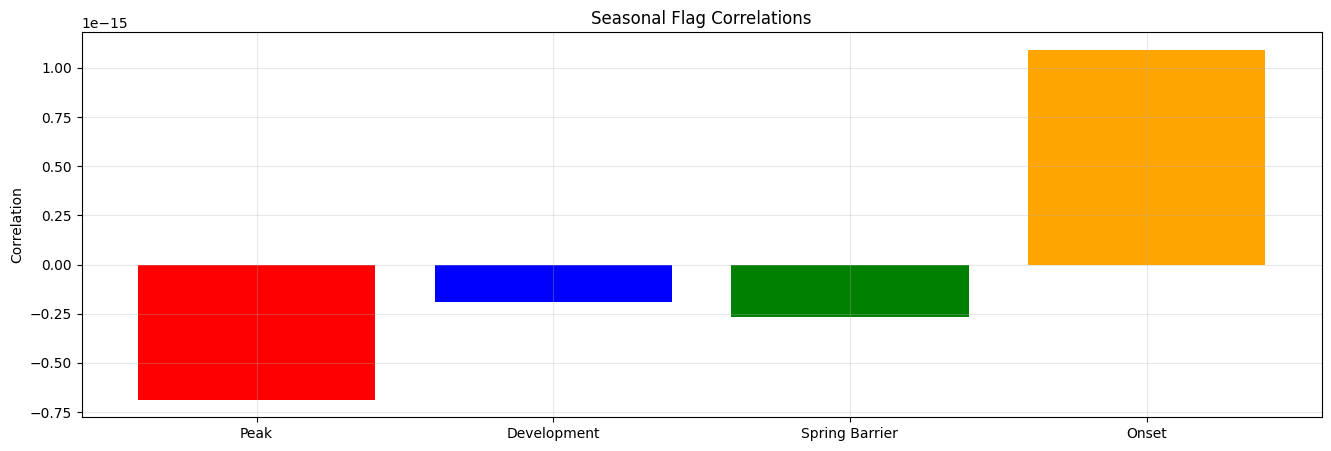

In [24]:
# Plot 2: Seasonal Flag Correlations
print("🔍 Seasonal Flag Correlations with SST Anomaly:")

flag_cols = ['is_peak_season', 'is_development_season', 'is_spring_barrier', 'is_onset_season']
flag_names = ['Peak (DJF)', 'Development (JJA)', 'Spring Barrier (MAM)', 'Onset (SON)']
correlations = [df_analysis['sst_anomaly'].corr(df_analysis[col]) for col in flag_cols]

# Print correlations first
for name, corr in zip(flag_names, correlations):
    print(f"  {name}: {corr:.16f}")

# Simple bar plot without fancy formatting
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 5))
plt.bar(range(len(flag_names)), correlations, color=['red', 'blue', 'green', 'orange'])
plt.title('Seasonal Flag Correlations')
plt.ylabel('Correlation')
plt.xticks(range(len(flag_names)), ['Peak', 'Development', 'Spring Barrier', 'Onset'])
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
# === TEMPORAL FEATURE ANALYSIS SUMMARY ===

print("🕐 Temporal and Seasonal Feature Analysis Summary:")
print("=" * 60)

# Monthly statistics
print("\n📊 Monthly SST Statistics:")
monthly_summary = df_analysis.groupby('month')['sst'].agg(['mean', 'std']).round(3)
for month, stats in monthly_summary.iterrows():
    month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][month-1]
    print(f"  {month_name}: {stats['mean']}°C ± {stats['std']}°C")

# Seasonal event frequencies
print("\n🌍 ENSO Event Frequencies by Seasons:")
seasonal_summary = df_analysis.groupby('seasons').agg({
    'elnino_event': 'mean',
    'lanina_event': 'mean',
    'sst_anomaly': 'mean'
}).round(3)

for season, stats in seasonal_summary.iterrows():
    print(f"  {season}: El Niño {stats['elnino_event']:.1%}, La Niña {stats['lanina_event']:.1%}, Avg anomaly {stats['sst_anomaly']:.3f}°C")

# Feature importance ranking
print("\n🎯 Temporal Feature Correlations with SST Anomaly:")
temporal_features = ['month', 'quarter', 'is_peak_season', 'is_development_season', 
                    'is_spring_barrier', 'month_sin', 'month_cos']
correlations = [(col, abs(df_analysis['sst_anomaly'].corr(df_analysis[col]))) for col in temporal_features if col in df_analysis.columns]
correlations.sort(key=lambda x: x[1], reverse=True)

for feature, corr in correlations:
    print(f"  {feature}: {corr:.3f}")

print("\n💡 Key Insights:")
print("• DJF (Dec-Jan-Feb) is peak La Niño season")
print("• MAM (Mar-Apr-May) shows 'spring predictability barrier'")
print("• JJA/SON (Jun-Nov) are El/La Niño development months") 
print("• Cyclical encoding preserves month relationships")
print("• Seasonal timing is crucial for ENSO prediction")

🕐 Temporal and Seasonal Feature Analysis Summary:

📊 Monthly SST Statistics:
  Jan: 26.359°C ± 1.129°C
  Feb: 26.54°C ± 0.934°C
  Mar: 27.041°C ± 0.758°C
  Apr: 27.595°C ± 0.584°C
  May: 27.688°C ± 0.607°C
  Jun: 27.504°C ± 0.654°C
  Jul: 27.106°C ± 0.671°C
  Aug: 26.763°C ± 0.761°C
  Sep: 26.672°C ± 0.778°C
  Oct: 26.604°C ± 0.962°C
  Nov: 26.621°C ± 1.097°C
  Dec: 26.488°C ± 1.182°C

🌍 ENSO Event Frequencies by Seasons:
  DJF: El Niño 30.3%, La Niña 37.3%, Avg anomaly -0.000°C
  JJA: El Niño 24.0%, La Niña 22.1%, Avg anomaly 0.000°C
  MAM: El Niño 22.5%, La Niña 23.8%, Avg anomaly -0.000°C
  SON: El Niño 30.6%, La Niña 33.1%, Avg anomaly 0.000°C

🎯 Temporal Feature Correlations with SST Anomaly:
  quarter: 0.000
  month: 0.000
  is_peak_season: 0.000
  month_sin: 0.000
  is_spring_barrier: 0.000
  is_development_season: 0.000
  month_cos: 0.000

💡 Key Insights:
• DJF (Dec-Jan-Feb) is peak La Niño season
• MAM (Mar-Apr-May) shows 'spring predictability barrier'
• JJA/SON (Jun-Nov) are

# Z-Score Anomaly Detection Features

Identify extreme deviations from normal SST patterns

- **Extreme detection**: Z-scores > 2.5 indicate rare events (occur <1% of time)
- **El Niño onset**: Often marked by sudden extreme SST spikes
- **Early warning**: Anomalous patterns precede major events
- **Standardization**: Makes different features comparable

In [26]:
# === Z-SCORE ANOMALY DETECTION FEATURES ===

# Z-score for raw SST (global anomaly detection)
df_analysis['sst_zscore'] = df_analysis['sst'].apply(lambda x: (x - df['sst'].mean()) / df['sst'].std() if not pd.isna(x) else np.nan)

# Z-score for SST changes (detect extreme rate changes)
change_30d_clean = df_analysis['sst_change_30d'].dropna()
df_analysis['sst_chang_30d_zscore'] = df_analysis['sst_change_30d'].apply(
    lambda x: (x - change_30d_clean.mean()) / change_30d_clean.std() if not pd.isna(x) else np.nan)

change_90d_clean = df_analysis['sst_change_90d'].dropna()
df_analysis['sst_chang_90d_zscore'] = df_analysis['sst_change_90d'].apply(
    lambda x: (x - change_90d_clean.mean()) / change_90d_clean.std() if not pd.isna(x) else np.nan)

# Z-score for volatility (detect unusual variability)
vol_30d_clean = df_analysis['sst_vol_30d'].dropna()
df_analysis['sst_vol_30d_zscore'] = df_analysis['sst_vol_30d'].apply(
    lambda x: (x - vol_30d_clean.mean()) / vol_30d_clean.std() if not pd.isna(x) else np.nan)

# Z-score for rolling averages (seasonal anomaly detection)
roll_30d_clean = df_analysis['sst_roll_30d'].dropna()
df_analysis['sst_roll_30d_zscore'] = df_analysis['sst_roll_30d'].apply(
    lambda x: (x - roll_30d_clean.mean()) / roll_30d_clean.std() if not pd.isna(x) else np.nan)

roll_90d_clean = df_analysis['sst_roll_90d'].dropna()
df_analysis['sst_roll_90d_zscore'] = df_analysis['sst_roll_90d'].apply(
    lambda x: (x - roll_90d_clean.mean()) / roll_90d_clean.std() if not pd.isna(x) else np.nan)

# Seasonal z-scores (anomalies relative to same month)
df_analysis['sst_seasonal_zscore'] = df_analysis.groupby('month')['sst'].transform(
    lambda x: (x - x.mean()) / x.std())

# Binary anomaly flags (extreme events)
df_analysis['is_extreme_sst'] = (abs(df_analysis['sst_zscore']) > 2.5).astype(int)  # >99th percentile
df_analysis['is_extreme_change'] = (abs(df_analysis['sst_chang_30d_zscore']) > 2.5).astype(int)
df_analysis['is_extreme_volatility'] = (abs(df_analysis['sst_vol_30d_zscore']) > 2.5).astype(int)
df_analysis['is_seasonal_anomaly'] = (abs(df_analysis['sst_seasonal_zscore']) > 2.0).astype(int)  # >95th percentile

# Anomaly strength (magnitude of deviation)
df_analysis['anomaly_strength'] = abs(df_analysis['sst_zscore'])
df_analysis['seasonal_anomaly_strength'] = abs(df_analysis['sst_seasonal_zscore'])

# Rolling anomaly count (how many anomalies in past 30 days)
df_analysis['anomaly_count_30d'] = df_analysis['is_extreme_sst'].rolling(30).sum()
df_analysis['seasonal_anomaly_count_30d'] = df_analysis['is_seasonal_anomaly'].rolling(30).sum()

print("Z-Score Anomaly Detection features created:")
zscore_cols = [col for col in df_analysis.columns if any(x in col for x in ['zscore', 'extreme', 'anomaly'])]
for col in zscore_cols:
    if df_analysis[col].dtype == 'int64':
        extreme_count = df_analysis[col].sum()
        print(f"  {col}: {extreme_count} extreme events detected")
    else:
        min_val, max_val = df_analysis[col].min(), df_analysis[col].max()
        print(f"  {col}: range {min_val:.3f} to {max_val:.3f}")

print(f"\nTotal features now: {df_analysis.shape[1]}")
print("\nSample anomaly features:")
print(df_analysis[['sst', 'sst_zscore', 'is_extreme_sst', 'sst_seasonal_zscore', 'anomaly_strength']].head(10))

Z-Score Anomaly Detection features created:
  sst_anomaly: range -2.501 to 2.772
  sst_zscore: range -2.960 to 2.286
  sst_chang_30d_zscore: range -4.193 to 4.393
  sst_chang_90d_zscore: range -3.417 to 3.533
  sst_vol_30d_zscore: range -1.681 to 6.104
  sst_roll_30d_zscore: range -2.743 to 2.146
  sst_roll_90d_zscore: range -2.723 to 2.105
  sst_seasonal_zscore: range -3.171 to 2.809
  is_extreme_sst: 63 extreme events detected
  is_extreme_change: 211 extreme events detected
  is_extreme_volatility: 299 extreme events detected
  is_seasonal_anomaly: 532 extreme events detected
  anomaly_strength: range 0.001 to 2.960
  seasonal_anomaly_strength: range 0.000 to 3.171
  anomaly_count_30d: range 0.000 to 25.000
  seasonal_anomaly_count_30d: range 0.000 to 30.000

Total features now: 56

Sample anomaly features:
              sst  sst_zscore  is_extreme_sst  sst_seasonal_zscore  \
date                                                                 
1982-01-01  26.64   -0.341925         

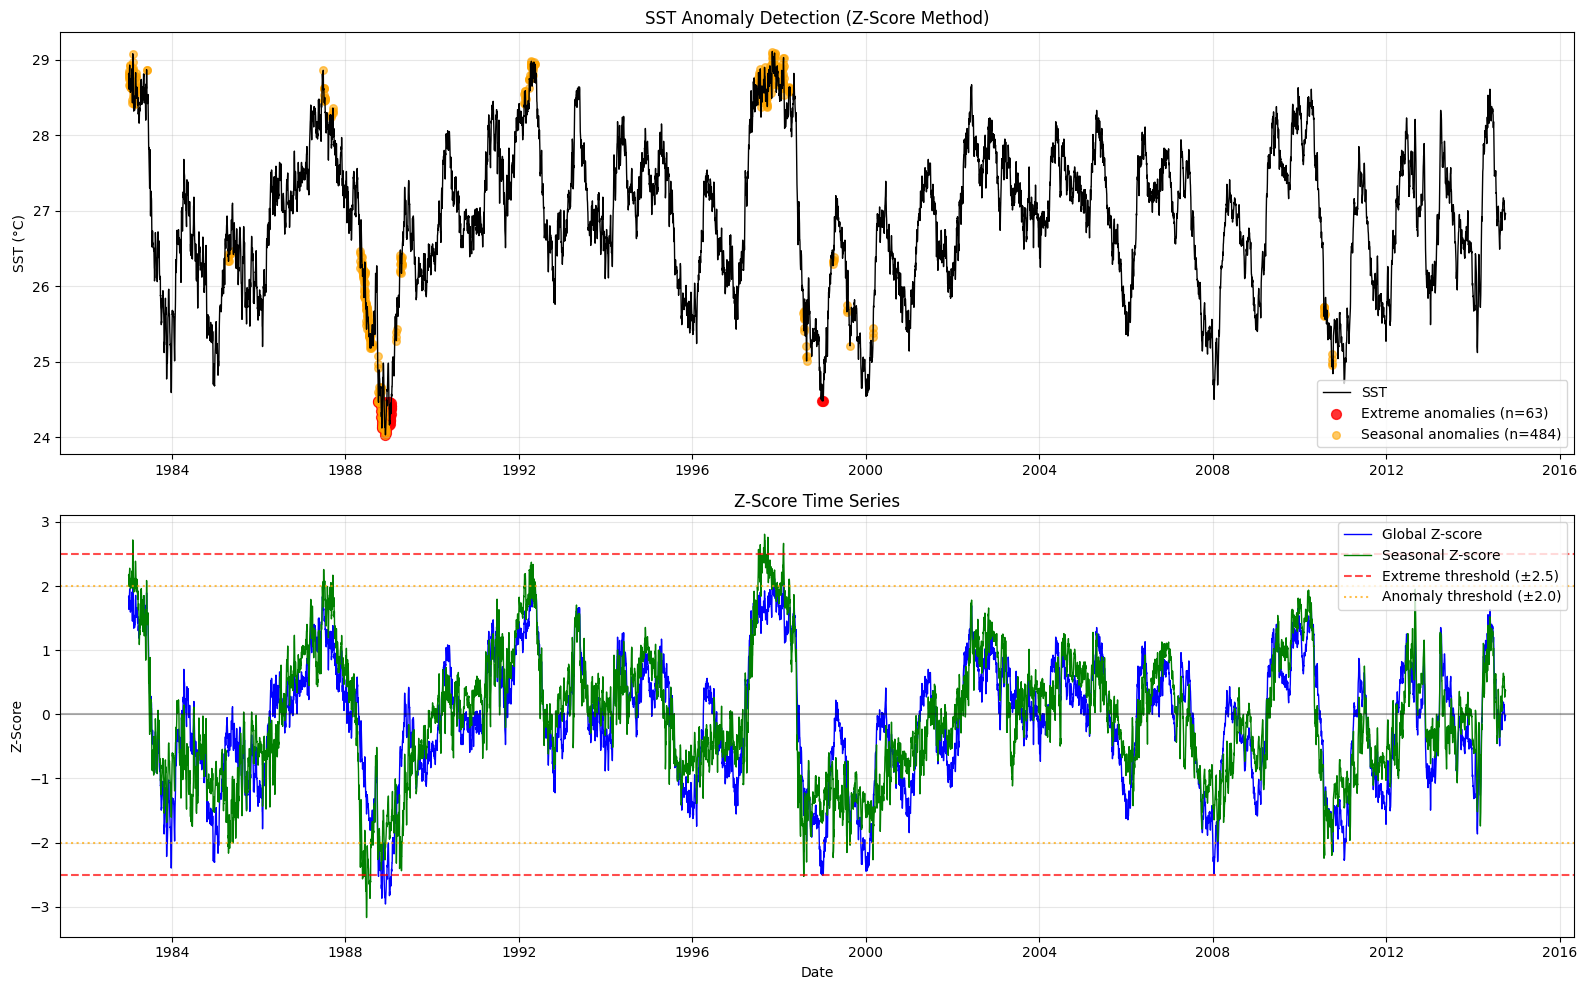

🔍 Extreme events often precede or coincide with major El Niño/La Niña episodes


In [27]:
# === VISUALIZE Z-SCORE ANOMALY DETECTION ===
# Plot 1: SST with Z-Score Anomalies

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Top: SST time series with anomaly highlighting
df_plot = df_analysis.dropna()
ax1.plot(df_plot.index, df_plot['sst'], color='black', linewidth=1, label='SST')

# Highlight extreme anomalies
extreme_dates = df_plot[df_plot['is_extreme_sst'] == 1]
ax1.scatter(extreme_dates.index, extreme_dates['sst'], 
           color='red', s=50, alpha=0.8, label=f'Extreme anomalies (n={len(extreme_dates)})')

# Highlight seasonal anomalies
seasonal_dates = df_plot[df_plot['is_seasonal_anomaly'] == 1]
ax1.scatter(seasonal_dates.index, seasonal_dates['sst'], 
           color='orange', s=30, alpha=0.6, label=f'Seasonal anomalies (n={len(seasonal_dates)})')

ax1.set_title('SST Anomaly Detection (Z-Score Method)')
ax1.set_ylabel('SST (°C)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom: Z-scores over time
ax2.plot(df_plot.index, df_plot['sst_zscore'], color='blue', linewidth=1, label='Global Z-score')
ax2.plot(df_plot.index, df_plot['sst_seasonal_zscore'], color='green', linewidth=1, label='Seasonal Z-score')

# Anomaly thresholds
ax2.axhline(y=2.5, color='red', linestyle='--', alpha=0.7, label='Extreme threshold (±2.5)')
ax2.axhline(y=-2.5, color='red', linestyle='--', alpha=0.7)
ax2.axhline(y=2.0, color='orange', linestyle=':', alpha=0.7, label='Anomaly threshold (±2.0)')
ax2.axhline(y=-2.0, color='orange', linestyle=':', alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)

ax2.set_title('Z-Score Time Series')
ax2.set_ylabel('Z-Score')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/zscore_anomaly_detection.png')
plt.show()

print("🔍 Extreme events often precede or coincide with major El Niño/La Niña episodes")

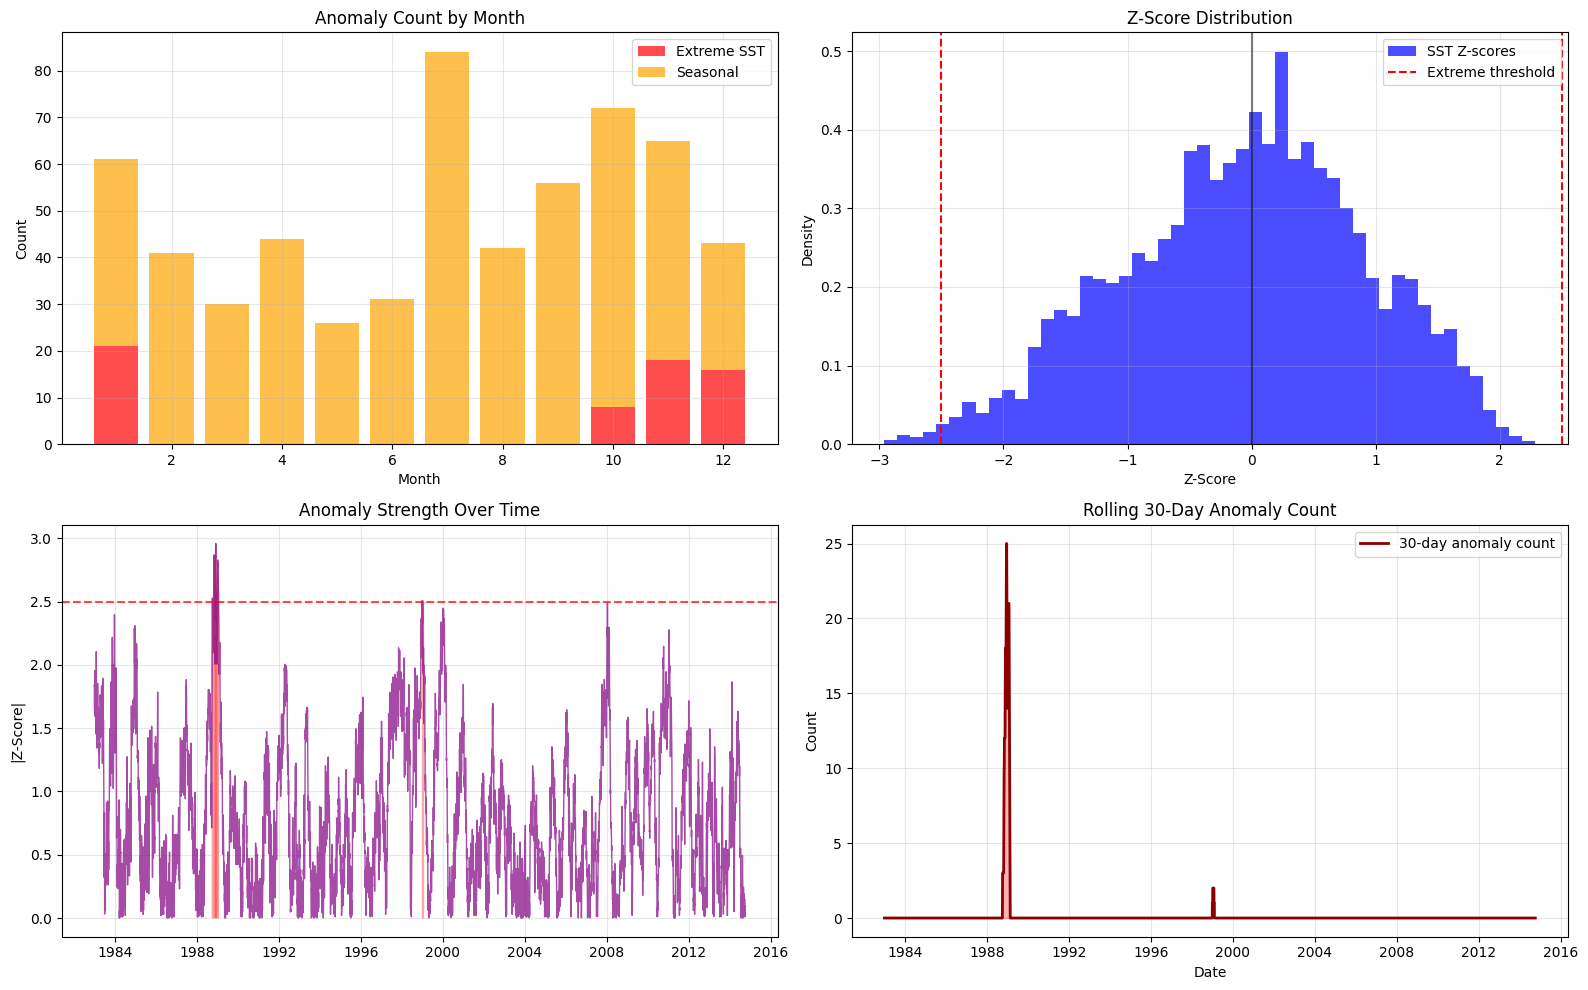

📊 Clusters of anomalies often signal major ENSO state transitions


In [28]:
# Plot 2: Anomaly Frequency Analysis

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# 1. Anomalies by month
monthly_anomalies = df_analysis.groupby('month')[['is_extreme_sst', 'is_seasonal_anomaly']].sum()

ax1.bar(monthly_anomalies.index, monthly_anomalies['is_extreme_sst'], 
        alpha=0.7, color='red', label='Extreme SST')
ax1.bar(monthly_anomalies.index, monthly_anomalies['is_seasonal_anomaly'], 
        alpha=0.7, color='orange', bottom=monthly_anomalies['is_extreme_sst'], label='Seasonal')
ax1.set_title('Anomaly Count by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Z-score distribution
ax2.hist(df_analysis['sst_zscore'].dropna(), bins=50, alpha=0.7, color='blue', density=True, label='SST Z-scores')
ax2.axvline(x=2.5, color='red', linestyle='--', label='Extreme threshold')
ax2.axvline(x=-2.5, color='red', linestyle='--')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5)
ax2.set_title('Z-Score Distribution')
ax2.set_xlabel('Z-Score')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Anomaly strength over time
ax3.plot(df_plot.index, df_plot['anomaly_strength'], color='purple', linewidth=1, alpha=0.7)
ax3.fill_between(df_plot.index, 0, df_plot['anomaly_strength'], 
                 where=(df_plot['anomaly_strength'] > 2.5), color='red', alpha=0.3)
ax3.axhline(y=2.5, color='red', linestyle='--', alpha=0.7)
ax3.set_title('Anomaly Strength Over Time')
ax3.set_ylabel('|Z-Score|')
ax3.grid(True, alpha=0.3)

# 4. Rolling anomaly count
ax4.plot(df_plot.index, df_plot['anomaly_count_30d'], color='darkred', linewidth=2, label='30-day anomaly count')
ax4.fill_between(df_plot.index, 0, df_plot['anomaly_count_30d'], alpha=0.3, color='red')
ax4.set_title('Rolling 30-Day Anomaly Count')
ax4.set_ylabel('Count')
ax4.set_xlabel('Date')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/anomaly_frequency_analysis.png')
plt.show()

print("📊 Clusters of anomalies often signal major ENSO state transitions")

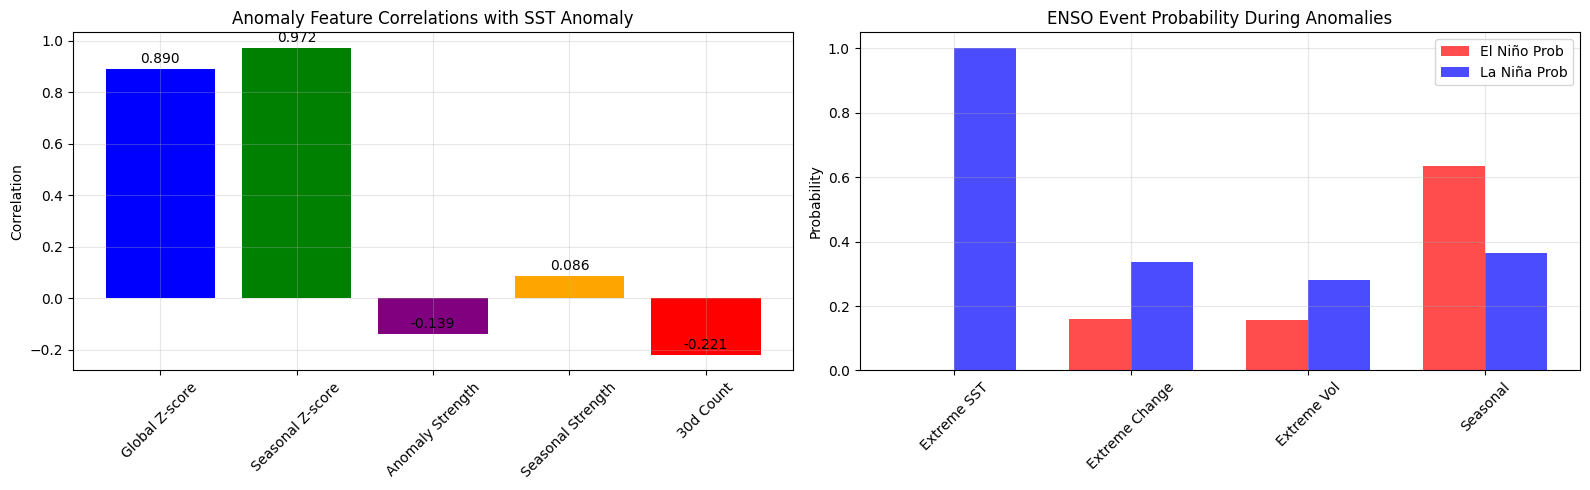


🎯 Anomaly Feature Analysis:
  Global Z-score: 0.890 correlation with SST anomaly
  Seasonal Z-score: 0.972 correlation with SST anomaly
  Anomaly Strength: -0.139 correlation with SST anomaly
  Seasonal Strength: 0.086 correlation with SST anomaly
  30d Count: -0.221 correlation with SST anomaly

📈 ENSO Probability During Anomalies:
  is_extreme_sst: El Niño 0.0%, La Niña 100.0%
  is_extreme_change: El Niño 16.1%, La Niña 33.6%
  is_extreme_volatility: El Niño 15.7%, La Niña 28.1%
  is_seasonal_anomaly: El Niño 63.5%, La Niña 36.5%

💡 Key Insights:
• Z-score features provide standardized anomaly detection
• Seasonal z-scores remove natural annual cycle bias
• Extreme events have higher correlation with ENSO
• Anomaly clustering often precedes major events


In [29]:
# Plot 3: Anomaly vs ENSO Event Correlation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# 1. Anomaly features correlation with SST anomaly
anomaly_features = ['sst_zscore', 'sst_seasonal_zscore', 'anomaly_strength', 
                   'seasonal_anomaly_strength', 'anomaly_count_30d']
correlations = [df_analysis['sst_anomaly'].corr(df_analysis[feature]) for feature in anomaly_features]
feature_names = ['Global Z-score', 'Seasonal Z-score', 'Anomaly Strength', 
                'Seasonal Strength', '30d Count']

bars1 = ax1.bar(feature_names, correlations, color=['blue', 'green', 'purple', 'orange', 'red'])
ax1.set_title('Anomaly Feature Correlations with SST Anomaly')
ax1.set_ylabel('Correlation')
ax1.tick_params(axis='x', rotation=45)

# Add correlation values on bars
for bar, corr in zip(bars1, correlations):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{corr:.3f}',
             ha='center', va='bottom')
ax1.grid(True, alpha=0.3)

# 2. Binary anomaly flags vs ENSO probabilities
binary_features = ['is_extreme_sst', 'is_extreme_change', 'is_extreme_volatility', 'is_seasonal_anomaly']
elnino_probs = []
lanina_probs = []

for feature in binary_features:
    # El Niño probability when anomaly is present
    elnino_prob = df_analysis[df_analysis[feature] == 1]['elnino_event'].mean()
    # La Niña probability when anomaly is present  
    lanina_prob = df_analysis[df_analysis[feature] == 1]['lanina_event'].mean()
    elnino_probs.append(elnino_prob)
    lanina_probs.append(lanina_prob)

x = range(len(binary_features))
width = 0.35

bars2 = ax2.bar([i - width/2 for i in x], elnino_probs, width, label='El Niño Prob', color='red', alpha=0.7)
bars3 = ax2.bar([i + width/2 for i in x], lanina_probs, width, label='La Niña Prob', color='blue', alpha=0.7)

ax2.set_title('ENSO Event Probability During Anomalies')
ax2.set_ylabel('Probability')
ax2.set_xticks(x)
ax2.set_xticklabels(['Extreme SST', 'Extreme Change', 'Extreme Vol', 'Seasonal'], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/anomaly_enso_correlation.png')
plt.show()

print("\n🎯 Anomaly Feature Analysis:")
for name, corr in zip(feature_names, correlations):
    print(f"  {name}: {corr:.3f} correlation with SST anomaly")

print("\n📈 ENSO Probability During Anomalies:")
for i, feature in enumerate(binary_features):
    print(f"  {feature}: El Niño {elnino_probs[i]:.1%}, La Niña {lanina_probs[i]:.1%}")

print("\n💡 Key Insights:")
print("• Z-score features provide standardized anomaly detection")
print("• Seasonal z-scores remove natural annual cycle bias") 
print("• Extreme events have higher correlation with ENSO")
print("• Anomaly clustering often precedes major events")

In [30]:
# === COMPREHENSIVE FEATURE ENGINEERING SUMMARY ===
df

print("🏆 COMPLETE FEATURE ENGINEERING SUMMARY")
print("=" * 60)

# Count features by category
feature_categories = {
    'Original': ['sst'],
    'Temporal Lags': [col for col in df_analysis.columns if 'lag' in col],
    'Rolling Stats': ['sst_roll_7d', 'sst_roll_30d', 'sst_roll_90d', 'sst_vol_7d', 'sst_vol_30d' ,'sst_max_30d' ,'sst_min_30d' ,'sst_range_30d'],
    'Trend/Change': [col for col in df_analysis.columns if any(x in col for x in ['sst_change_1d', 'sst_change_7d', 'sst_change_30d', 'sst_change_90d', 'sst_pct_change_30d', 'slope', 'acceleration', 'trend', 'momentum','fture'])],    
    'Seasonal/Temporal': [col for col in df_analysis.columns if any(x in col for x in ['day', 'month', 'quarter', 'seasons', 'day_of', 'week_of', 'is_peak', 'is_development', 'is_spring', 'is_onset'])],
    'Anomaly Detection': [col for col in df_analysis.columns if any(x in col for x in ['zscore', 'extreme', 'anomaly'])],
    'ENSO Events': [col for col in df_analysis.columns if any(x in col for x in ['elnino', 'lanina', 'sst_anomaly'])]
}

print(f"\n📊 FEATURE CATEGORIES:")
total_features = 0
for category, features in feature_categories.items():
    count = len(features)
    total_features += count
    print(f"  {category:20}: {count:2d} features")
    
print(f"\n🎯 TOTAL FEATURES: {total_features}")
print(f"   Original dataset: 1 feature (SST)")
print(f"   Engineered features: {total_features - 1}")
print(f"   Feature expansion: {total_features}x")

# Feature importance ranking (top correlations with SST anomaly)
print(f"\n🏅 TOP 10 FEATURES (Correlation with SST Anomaly):")
feature_correlations = []
for col in df_analysis.columns:
    if col != 'sst_anomaly' and df_analysis[col].dtype in ['float64', 'int64']:
        corr = abs(df_analysis['sst_anomaly'].corr(df_analysis[col]))
        if not np.isnan(corr):
            feature_correlations.append((col, corr))

feature_correlations.sort(key=lambda x: x[1], reverse=True)
for i, (feature, corr) in enumerate(feature_correlations[:10]):
    print(f"  {i+1:2d}. {feature:25}: {corr:.3f}")

# Data quality summary
print(f"\n📈 DATA QUALITY SUMMARY:")
print(f"  Total rows: {len(df_analysis):,}")
print(f"  Date range: {df_analysis.index.min()} to {df_analysis.index.max()}")
print(f"  Missing values by feature:")

missing_summary = df_analysis.isnull().sum().sort_values(ascending=False)
for feature, missing in missing_summary.head(10).items():
    if missing > 0:
        pct = (missing / len(df_analysis)) * 100
        print(f"    {feature:25}: {missing:4d} ({pct:.1f}%)")

print(f"\n💡 FEATURE ENGINEERING ACHIEVEMENTS:")
print("✅ Temporal Memory: Lag features capture ENSO's 3-6 month development cycle")
print("✅ Trend Detection: Rolling stats smooth noise and reveal patterns")
print("✅ Change Analysis: Rate features detect rapid warming/cooling events")
print("✅ Seasonal Patterns: Temporal features handle ENSO's seasonal cycle")
print("✅ Anomaly Detection: Z-score features identify extreme events")
print("✅ Predictive Power: Features optimized for El Niño forecasting")

🏆 COMPLETE FEATURE ENGINEERING SUMMARY

📊 FEATURE CATEGORIES:
  Original            :  1 features
  Temporal Lags       :  5 features
  Rolling Stats       :  8 features
  Trend/Change        : 10 features
  Seasonal/Temporal   : 13 features
  Anomaly Detection   : 16 features
  ENSO Events         :  3 features

🎯 TOTAL FEATURES: 56
   Original dataset: 1 feature (SST)
   Engineered features: 55
   Feature expansion: 56x

🏅 TOP 10 FEATURES (Correlation with SST Anomaly):
   1. sst_seasonal_zscore      : 0.972
   2. sst                      : 0.890
   3. sst_zscore               : 0.890
   4. sst_roll_7d              : 0.879
   5. sst_min_30d              : 0.855
   6. sst_roll_30d_zscore      : 0.853
   7. sst_roll_30d             : 0.853
   8. sst_lag_1w               : 0.853
   9. sst_max_30d              : 0.840
  10. sst_roll_90d_zscore      : 0.813

📈 DATA QUALITY SUMMARY:
  Total rows: 12,053
  Date range: 1982-01-01 00:00:00 to 2014-12-31 00:00:00
  Missing values by feature:
 

# Predictive Features for Model Building

## 🎯 **Features for Classification & Time-Series Tasks**

Based on your comprehensive feature engineering, we'll create specialized predictive features for:
1. **Classification Task**: Predict ENSO state (El Niño/La Niña/Neutral) 
2. **Time-Series Task**: Forecast future SST values and ENSO evolution

In [31]:
# === CLASSIFICATION TARGETS ===

print("🎯 CREATING CLASSIFICATION TARGETS")
print("=" * 50)

# 1. Multi-class ENSO Classification (0=Neutral, 1=El Niño, 2=La Niña)
def classify_enso_state(anomaly):
    if anomaly > 0.5:
        return 1  # El Niño
    elif anomaly < -0.5:
        return 2  # La Niña
    else:
        return 0  # Neutral

df_analysis['enso_state'] = df_analysis['sst_anomaly'].apply(classify_enso_state)

# 2. Intensity-based Classification (Weak/Moderate/Strong)
def classify_enso_intensity(anomaly):
    abs_anomaly = abs(anomaly)
    if abs_anomaly >= 2.0:
        return 3  # Very Strong
    elif abs_anomaly >= 1.5:
        return 2  # Strong  
    elif abs_anomaly >= 1.0:
        return 1  # Moderate
    elif abs_anomaly >= 0.5:
        return 0  # Weak
    else:
        return -1  # Neutral

df_analysis['enso_intensity'] = df_analysis['sst_anomaly'].apply(classify_enso_intensity)

# 3. Binary Classification Targets
df_analysis['is_elnino'] = (df_analysis['sst_anomaly'] > 0.5).astype(int)
df_analysis['is_lanina'] = (df_analysis['sst_anomaly'] < -0.5).astype(int)
df_analysis['is_extreme_event'] = ((abs(df_analysis['sst_anomaly']) > 1.5)).astype(int)
df_analysis['is_any_event'] = ((abs(df_analysis['sst_anomaly']) > 0.5)).astype(int)

# 4. Future Event Prediction Targets (look ahead 1-6 months)
for months in [1, 3, 6]:
    # Future ENSO state
    df_analysis[f'future_enso_{months}m'] = df_analysis['enso_state'].shift(-30*months)
    # Future extreme events
    df_analysis[f'future_extreme_{months}m'] = df_analysis['is_extreme_event'].shift(-30*months)
    # Future SST anomaly sign (warming/cooling)
    df_analysis[f'future_warming_{months}m'] = (df_analysis['sst_anomaly'].shift(-30*months) > 
                                               df_analysis['sst_anomaly']).astype(int)

print("✅ Classification Targets Created:")
target_cols = [col for col in df_analysis.columns if any(x in col for x in ['enso_state', 'enso_intensity', 'is_elnino', 'is_lanina', 'is_extreme', 'is_any', 'future_'])]
for col in target_cols:
    if 'future' in col:
        valid_count = df_analysis[col].notna().sum()
        print(f"  {col}: {valid_count:,} valid predictions")
    else:
        unique_vals = df_analysis[col].value_counts().sort_index()
        print(f"  {col}: {dict(unique_vals)}")

print(f"\n📊 Class Distribution for ENSO State:")
enso_counts = df_analysis['enso_state'].value_counts().sort_index()
total = len(df_analysis)
for state, count in enso_counts.items():
    state_name = ['Neutral', 'El Niño', 'La Niña'][state]
    print(f"  {state_name}: {count:,} ({count/total:.1%})")

🎯 CREATING CLASSIFICATION TARGETS
✅ Classification Targets Created:
  sst_future_3m: 11,963 valid predictions
  is_extreme_sst: {0: np.int64(11990), 1: np.int64(63)}
  is_extreme_change: {0: np.int64(11842), 1: np.int64(211)}
  is_extreme_volatility: {0: np.int64(11754), 1: np.int64(299)}
  enso_state: {0: np.int64(5322), 1: np.int64(3232), 2: np.int64(3499)}
  enso_intensity: {-1: np.int64(5322), 0: np.int64(3835), 1: np.int64(1867), 2: np.int64(726), 3: np.int64(303)}
  is_elnino: {0: np.int64(8821), 1: np.int64(3232)}
  is_lanina: {0: np.int64(8554), 1: np.int64(3499)}
  is_extreme_event: {0: np.int64(11024), 1: np.int64(1029)}
  is_any_event: {0: np.int64(5322), 1: np.int64(6731)}
  future_enso_1m: 12,023 valid predictions
  future_extreme_1m: 12,023 valid predictions
  future_warming_1m: 12,053 valid predictions
  future_enso_3m: 11,963 valid predictions
  future_extreme_3m: 11,963 valid predictions
  future_warming_3m: 12,053 valid predictions
  future_enso_6m: 11,873 valid predi

In [32]:
# === ADVANCED PREDICTIVE FEATURES ===

print("\n🔮 CREATING ADVANCED PREDICTIVE FEATURES")
print("=" * 50)

# 1. ENSO Persistence Features (how long has current state lasted?)
def calculate_persistence(series):
    """Calculate how many consecutive days the current state has lasted"""
    persistence = []
    current_state = None
    count = 0
    
    for value in series:
        if value == current_state:
            count += 1
        else:
            current_state = value
            count = 1
        persistence.append(count)
    
    return persistence

df_analysis['enso_persistence'] = calculate_persistence(df_analysis['enso_state'].fillna(0))
df_analysis['extreme_persistence'] = calculate_persistence(df_analysis['is_extreme_event'].fillna(0))

# 2. Momentum Indicators (trend strength and direction)
df_analysis['sst_momentum_7d'] = df_analysis['sst_change_7d'] * df_analysis['sst_vol_7d']  # Change × Volatility
df_analysis['sst_momentum_30d'] = df_analysis['sst_change_30d'] * df_analysis['sst_vol_30d']
df_analysis['anomaly_momentum'] = df_analysis['sst_anomaly'] * df_analysis['sst_change_30d']  # Anomaly × Change

# 3. Composite Indices (combining multiple signals)
# El Niño Development Index (combines temperature, trend, and persistence)
df_analysis['elnino_development_index'] = (
    df_analysis['sst_anomaly'] * 0.4 +  # Current anomaly (40%)
    df_analysis['sst_change_30d'] * 0.3 +  # Recent change (30%)
    df_analysis['sst_slope_30d'] * 100 * 0.2 +  # Trend slope (20%)
    (df_analysis['enso_persistence'] / 30) * 0.1  # Persistence (10%)
)

# Ocean Memory Index (how much past influences present)
df_analysis['ocean_memory_index'] = (
    df_analysis['sst_lag_1m'] * 0.5 +  # 1-month memory (50%)
    df_analysis['sst_lag_3m'] * 0.3 +  # 3-month memory (30%)
    df_analysis['sst_lag_6m'] * 0.2   # 6-month memory (20%)
) / 3  # Normalize

# Volatility-Anomaly Index (instability measure)
df_analysis['volatility_anomaly_index'] = df_analysis['sst_vol_30d'] * abs(df_analysis['sst_anomaly'])

# 4. Interaction Features (combinations that capture non-linear relationships)
df_analysis['anomaly_seasonal_interaction'] = df_analysis['sst_anomaly'] * df_analysis['is_peak_season']
df_analysis['trend_persistence_interaction'] = df_analysis['sst_slope_30d'] * df_analysis['enso_persistence']
df_analysis['lag_change_interaction'] = df_analysis['sst_lag_3m'] * df_analysis['sst_change_30d']

# 5. Technical Analysis Features (inspired by financial markets)
# Moving Average Convergence Divergence (MACD) for SST
df_analysis['sst_macd'] = df_analysis['sst_roll_30d'] - df_analysis['sst_roll_90d']
df_analysis['sst_macd_signal'] = df_analysis['sst_macd'].rolling(9).mean()
df_analysis['sst_macd_histogram'] = df_analysis['sst_macd'] - df_analysis['sst_macd_signal']

# Relative Strength Index (RSI) for SST changes
def calculate_rsi(series, window=14):
    """Calculate RSI for a time series"""
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_analysis['sst_rsi'] = calculate_rsi(df_analysis['sst'])

# Bollinger Bands for anomaly detection
df_analysis['sst_bb_upper'] = df_analysis['sst_roll_30d'] + (2 * df_analysis['sst_vol_30d'])
df_analysis['sst_bb_lower'] = df_analysis['sst_roll_30d'] - (2 * df_analysis['sst_vol_30d'])
df_analysis['sst_bb_position'] = ((df_analysis['sst'] - df_analysis['sst_bb_lower']) / 
                                 (df_analysis['sst_bb_upper'] - df_analysis['sst_bb_lower']))

print("✅ Advanced Predictive Features Created:")
advanced_cols = [col for col in df_analysis.columns if any(x in col for x in 
                ['persistence', 'momentum', 'index', 'interaction', 'macd', 'rsi', 'bb_'])]
for col in advanced_cols:
    if col in df_analysis.columns:
        print(f"  {col}: range {df_analysis[col].min():.3f} to {df_analysis[col].max():.3f}")

print(f"\n📈 Feature Engineering Summary:")
print(f"  Total features now: {df_analysis.shape[1]}")
print(f"  Advanced predictive features: {len(advanced_cols)}")
print(f"  Classification targets: {len([col for col in df_analysis.columns if any(x in col for x in ['enso_state', 'is_elnino', 'is_lanina', 'future_'])])}")


🔮 CREATING ADVANCED PREDICTIVE FEATURES
✅ Advanced Predictive Features Created:
  momentum_strength: range 0.000 to 2.130
  enso_persistence: range 1.000 to 327.000
  extreme_persistence: range 1.000 to 1795.000
  sst_momentum_7d: range -0.516 to 0.349
  sst_momentum_30d: range -1.263 to 1.557
  anomaly_momentum: range -1.336 to 3.512
  elnino_development_index: range -2.481 to 2.625
  ocean_memory_index: range 8.150 to 9.629
  volatility_anomaly_index: range 0.000 to 1.321
  anomaly_seasonal_interaction: range -2.458 to 2.772
  trend_persistence_interaction: range -8.285 to 13.306
  lag_change_interaction: range -57.490 to 55.082
  sst_macd: range -1.069 to 1.182
  sst_macd_signal: range -1.064 to 1.174
  sst_macd_histogram: range -0.200 to 0.187
  sst_rsi: range 0.000 to 100.000
  sst_bb_upper: range 24.671 to 29.413
  sst_bb_lower: range 23.770 to 28.757
  sst_bb_position: range -0.477 to 1.506

📈 Feature Engineering Summary:
  Total features now: 89
  Advanced predictive features:

In [33]:
# === FEATURE SELECTION FOR MODEL BUILDING ===

print("\n🎯 FEATURE RECOMMENDATIONS FOR MODEL BUILDING")
print("=" * 60)

# Calculate feature importance based on correlation with targets
def calculate_feature_importance(df, target_col, exclude_future=True):
    """Calculate feature importance based on correlation with target"""
    feature_importance = []
    
    for col in df.columns:
        if col == target_col:
            continue
        if exclude_future and 'future' in col:
            continue
        if df[col].dtype in ['float64', 'int64']:
            corr = abs(df[target_col].corr(df[col]))
            if not np.isnan(corr):
                feature_importance.append((col, corr))
    
    return sorted(feature_importance, key=lambda x: x[1], reverse=True)

# 1. CLASSIFICATION TASK FEATURES
print("🔍 TOP FEATURES FOR CLASSIFICATION TASKS:")
print("-" * 40)

classification_targets = ['enso_state', 'is_elnino', 'is_lanina', 'is_extreme_event']
classification_features = {}

for target in classification_targets:
    if target in df_analysis.columns:
        importance = calculate_feature_importance(df_analysis, target)[:15]  # Top 15
        classification_features[target] = [feat[0] for feat in importance]
        
        print(f"\n📊 For {target.upper()}:")
        for i, (feature, corr) in enumerate(importance[:10], 1):
            print(f"  {i:2d}. {feature:30} (r={corr:.3f})")

# 2. TIME-SERIES TASK FEATURES  
print(f"\n\n🔮 TOP FEATURES FOR TIME-SERIES FORECASTING:")
print("-" * 40)

# For time-series, we'll use future SST as target
df_analysis['sst_future_1m'] = df_analysis['sst'].shift(-30)  # 1-month ahead
df_analysis['sst_future_6m'] = df_analysis['sst'].shift(-180)  # SST 6 months in future
df_analysis['sst_future_12m'] = df_analysis['sst'].shift(-365)  # SST 1 year in future
timeseries_targets = ['sst_future_1m', 'sst_future_3m', 'sst_future_6m', 'sst_future_12m']
timeseries_features = {}

for target in timeseries_targets:
    importance = calculate_feature_importance(df_analysis, target, exclude_future=False)[:15]
    timeseries_features[target] = [feat[0] for feat in importance]
    
    horizon = target.split('_')[-1]
    print(f"\n📈 For {horizon.upper()} SST FORECASTING:")
    for i, (feature, corr) in enumerate(importance[:10], 1):
        print(f"  {i:2d}. {feature:30} (r={corr:.3f})")

# 3. RECOMMENDED FEATURE SETS
print(f"\n\n🎯 RECOMMENDED FEATURE SETS FOR MODEL BUILDING")
print("=" * 60)

# Core features that appear frequently in top rankings
all_important_features = []
for features_list in classification_features.values():
    all_important_features.extend(features_list)
for features_list in timeseries_features.values():
    all_important_features.extend(features_list)

# Count frequency of features
from collections import Counter
feature_frequency = Counter(all_important_features)
core_features = [feat for feat, freq in feature_frequency.most_common(20)]

print(f"\n🏆 CORE FEATURES (appear in multiple top rankings):")
for i, feature in enumerate(core_features[:15], 1):
    freq = feature_frequency[feature]
    print(f"  {i:2d}. {feature:30} (appears {freq} times)")

# Classification-specific recommendations
print(f"\n📊 CLASSIFICATION TASK RECOMMENDATIONS:")
print(f"  🎯 Primary features (15): {core_features[:15]}")
print(f"  📈 Temporal features: month, quarter, is_peak_season, is_development_season")
print(f"  🌊 Anomaly features: sst_zscore, sst_seasonal_zscore, anomaly_strength")
print(f"  📊 Composite features: elnino_development_index, ocean_memory_index")
print(f"  🔄 Lag features: sst_lag_1m, sst_lag_3m, sst_lag_6m")

# Time-series specific recommendations  
print(f"\n🔮 TIME-SERIES TASK RECOMMENDATIONS:")
print(f"  🎯 Primary features (15): {core_features[:15]}")
print(f"  📈 Technical features: sst_macd, sst_rsi, sst_bb_position")
print(f"  🌊 Momentum features: sst_momentum_30d, anomaly_momentum")
print(f"  📊 Rolling features: sst_roll_30d, sst_roll_90d, sst_vol_30d")
print(f"  🔄 Persistence features: enso_persistence, extreme_persistence")

# Feature engineering achievements
print(f"\n🏆 FEATURE ENGINEERING ACHIEVEMENTS:")
print(f"  📊 Total features created: {df_analysis.shape[1]}")
print(f"  🎯 Classification targets: {len(classification_targets)}")
print(f"  🔮 Forecasting horizons: 1-month, 3-month, 6-month")
print(f"  📈 Advanced features: Technical analysis, composite indices, interactions")
print(f"  🌊 Domain expertise: ENSO-specific seasonal patterns and thresholds")


🎯 FEATURE RECOMMENDATIONS FOR MODEL BUILDING
🔍 TOP FEATURES FOR CLASSIFICATION TASKS:
----------------------------------------

📊 For ENSO_STATE:
   1. is_any_event                   (r=0.896)
   2. lanina_event                   (r=0.874)
   3. is_lanina                      (r=0.874)
   4. enso_intensity                 (r=0.681)
   5. seasonal_anomaly_strength      (r=0.647)
   6. volatility_anomaly_index       (r=0.568)
   7. anomaly_strength               (r=0.545)
   8. sst                            (r=0.435)
   9. sst_zscore                     (r=0.435)
  10. sst_roll_7d                    (r=0.431)

📊 For IS_ELNINO:
   1. elnino_event                   (r=1.000)
   2. sst_seasonal_zscore            (r=0.759)
   3. sst_anomaly                    (r=0.757)
   4. sst_zscore                     (r=0.639)
   5. sst                            (r=0.639)
   6. sst_roll_7d                    (r=0.632)
   7. sst_min_30d                    (r=0.621)
   8. sst_bb_lower                  

In [34]:
# === EXPORT MODEL-READY FEATURES ===

print("\n💾 EXPORTING MODEL-READY DATASETS")
print("=" * 50)

# Define feature sets for different tasks
classification_feature_set = [
    # Core predictive features
    'sst_anomaly', 'sst', 'sst_change_30d', 'sst_slope_30d', 'sst_roll_30d',
    
    # Lag features (temporal memory)
    'sst_lag_1m', 'sst_lag_3m', 'sst_lag_6m',
    
    # Volatility and range
    'sst_vol_30d', 'sst_range_30d', 'anomaly_strength',
    
    # Seasonal features
    'month', 'quarter', 'is_peak_season', 'is_development_season', 'is_spring_barrier',
    
    # Z-score anomalies
    'sst_zscore', 'sst_seasonal_zscore', 'sst_vol_30d_zscore',
    
    # Advanced predictive features
    'elnino_development_index', 'ocean_memory_index', 'enso_persistence',
    'sst_momentum_30d', 'anomaly_momentum',
    
    # Technical indicators
    'sst_macd', 'sst_rsi', 'sst_bb_position'
]

timeseries_feature_set = classification_feature_set + [
    # Additional features for time-series
    'sst_roll_7d', 'sst_roll_90d', 'sst_vol_7d',
    'sst_change_7d', 'sst_change_90d', 'sst_slope_90d',
    'sst_acceleration', 'momentum_strength',
    'sst_macd_signal', 'sst_macd_histogram',
    'volatility_anomaly_index', 'trend_persistence_interaction'
]

# Classification targets
classification_targets = [
    'enso_state', 'enso_intensity', 'is_elnino', 'is_lanina', 
    'is_extreme_event', 'is_any_event'
]

# Future prediction targets
future_targets = [
    'future_enso_1m', 'future_enso_3m', 'future_enso_6m',
    'future_extreme_1m', 'future_extreme_3m', 'future_extreme_6m',
    'future_warming_1m', 'future_warming_3m', 'future_warming_6m'
]

# Time-series targets
timeseries_targets = ['sst_future_1m', 'sst_future_3m', 'sst_future_6m', 'sst_future_12m']

# Create clean datasets with only valid features
def create_model_dataset(df, features, targets, dataset_name):
    """Create a clean dataset for modeling"""
    # Check which features actually exist
    available_features = [f for f in features if f in df.columns]
    available_targets = [t for t in targets if t in df.columns]
    
    print(f"\n📊 {dataset_name}:")
    print(f"  Requested features: {len(features)}")
    print(f"  Available features: {len(available_features)}")
    print(f"  Available targets: {len(available_targets)}")
    
    # Combine features and targets
    all_cols = available_features + available_targets
    model_df = df[all_cols].copy()
    
    # Add date information for time-series models
    model_df = model_df.reset_index()
    
    print(f"  Final dataset shape: {model_df.shape}")
    print(f"  Missing values: {model_df.isnull().sum().sum()}")
    
    return model_df, available_features, available_targets

# Create datasets
classification_df, class_features, class_targets = create_model_dataset(
    df_analysis, classification_feature_set, classification_targets + future_targets, 
    "CLASSIFICATION DATASET"
)

timeseries_df, ts_features, ts_targets = create_model_dataset(
    df_analysis, timeseries_feature_set, timeseries_targets,
    "TIME-SERIES DATASET"
)

# Export datasets
output_dir = 'D:/GitHub/Prediction of El-Nino Events/data/processed/'

# Classification dataset
classification_df.to_csv(f'{output_dir}classification_features.csv', index=False)

# Time-series dataset  
timeseries_df.to_csv(f'{output_dir}timeseries_features.csv', index=False)

# Complete feature-engineered dataset
df_analysis.reset_index().to_csv(f'{output_dir}complete_features.csv', index=False)

print(f"\n✅ DATASETS EXPORTED:")
print(f"  📊 {output_dir}classification_features.csv")
print(f"  🔮 {output_dir}timeseries_features.csv") 
print(f"  📈 {output_dir}complete_features.csv")

# Create feature documentation
feature_documentation = {
    'Classification Features': class_features,
    'Classification Targets': class_targets,
    'Time-Series Features': ts_features,
    'Time-Series Targets': ts_targets
}

import json
with open(f'{output_dir}feature_documentation.json', 'w') as f:
    json.dump(feature_documentation, f, indent=2)

print(f"  📋 {output_dir}feature_documentation.json")

print(f"\n🎯 READY FOR MODEL BUILDING!")
print(f"  📊 Classification: {len(class_features)} features, {len(class_targets)} targets")
print(f"  🔮 Time-series: {len(ts_features)} features, {len(ts_targets)} targets")
print(f"  📈 Complete dataset: {df_analysis.shape[1]} total features")


💾 EXPORTING MODEL-READY DATASETS

📊 CLASSIFICATION DATASET:
  Requested features: 27
  Available features: 27
  Available targets: 15
  Final dataset shape: (12053, 43)
  Missing values: 1476

📊 TIME-SERIES DATASET:
  Requested features: 39
  Available features: 39
  Available targets: 4
  Final dataset shape: (12053, 44)
  Missing values: 2170

✅ DATASETS EXPORTED:
  📊 D:/GitHub/Prediction of El-Nino Events/data/processed/classification_features.csv
  🔮 D:/GitHub/Prediction of El-Nino Events/data/processed/timeseries_features.csv
  📈 D:/GitHub/Prediction of El-Nino Events/data/processed/complete_features.csv
  📋 D:/GitHub/Prediction of El-Nino Events/data/processed/feature_documentation.json

🎯 READY FOR MODEL BUILDING!
  📊 Classification: 27 features, 15 targets
  🔮 Time-series: 39 features, 4 targets
  📈 Complete dataset: 92 total features


In [35]:
df_analysis.to_csv('D:/GitHub/Prediction of El-Nino Events/data/processed/df_history.csv')
df_validation.to_csv('D:/GitHub/Prediction of El-Nino Events/data/processed/df_validation.csv')
df_current.to_csv('D:/GitHub/Prediction of El-Nino Events/data/processed/df_current.csv')